In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import mplhep as hep

from scipy.optimize import curve_fit
from matplotlib import cm
from matplotlib.colors import LogNorm
from LatexConstants import *

In [2]:
def line(x, q):
    return 0*x + q

def sigmoid(x, a, b, c):
    return a*(1/(1+ np.exp(-b*(x-c))))

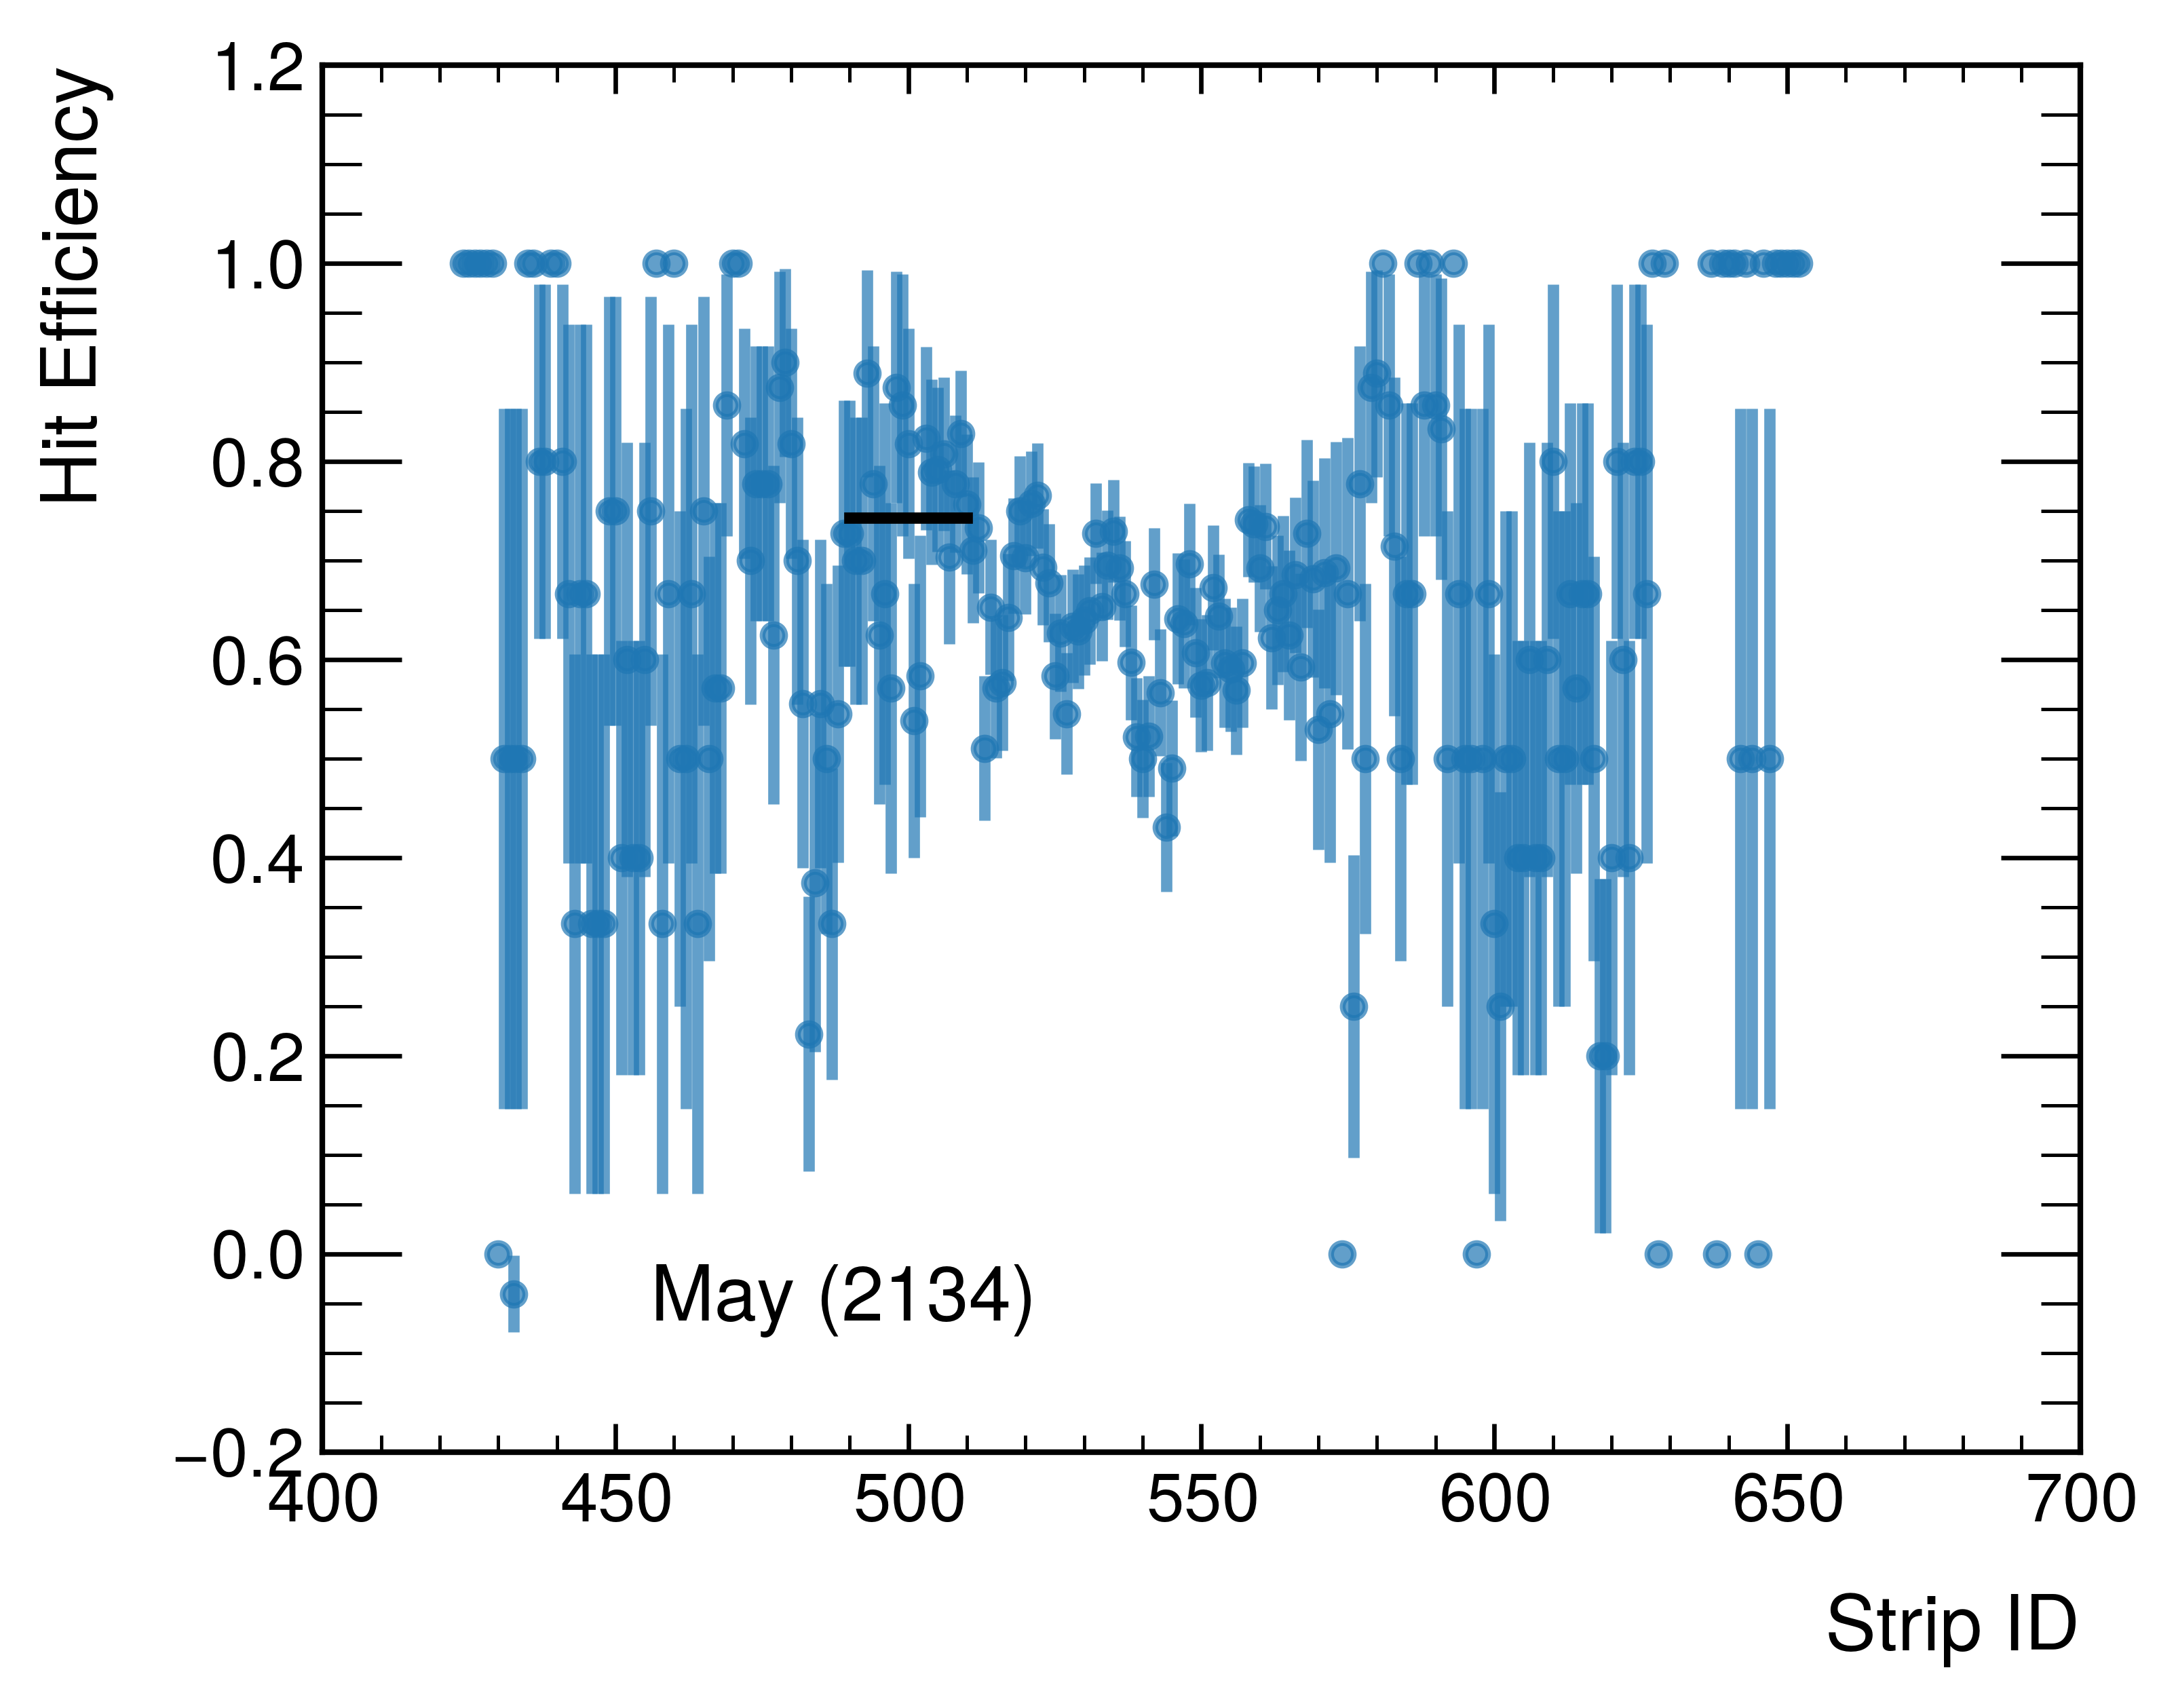

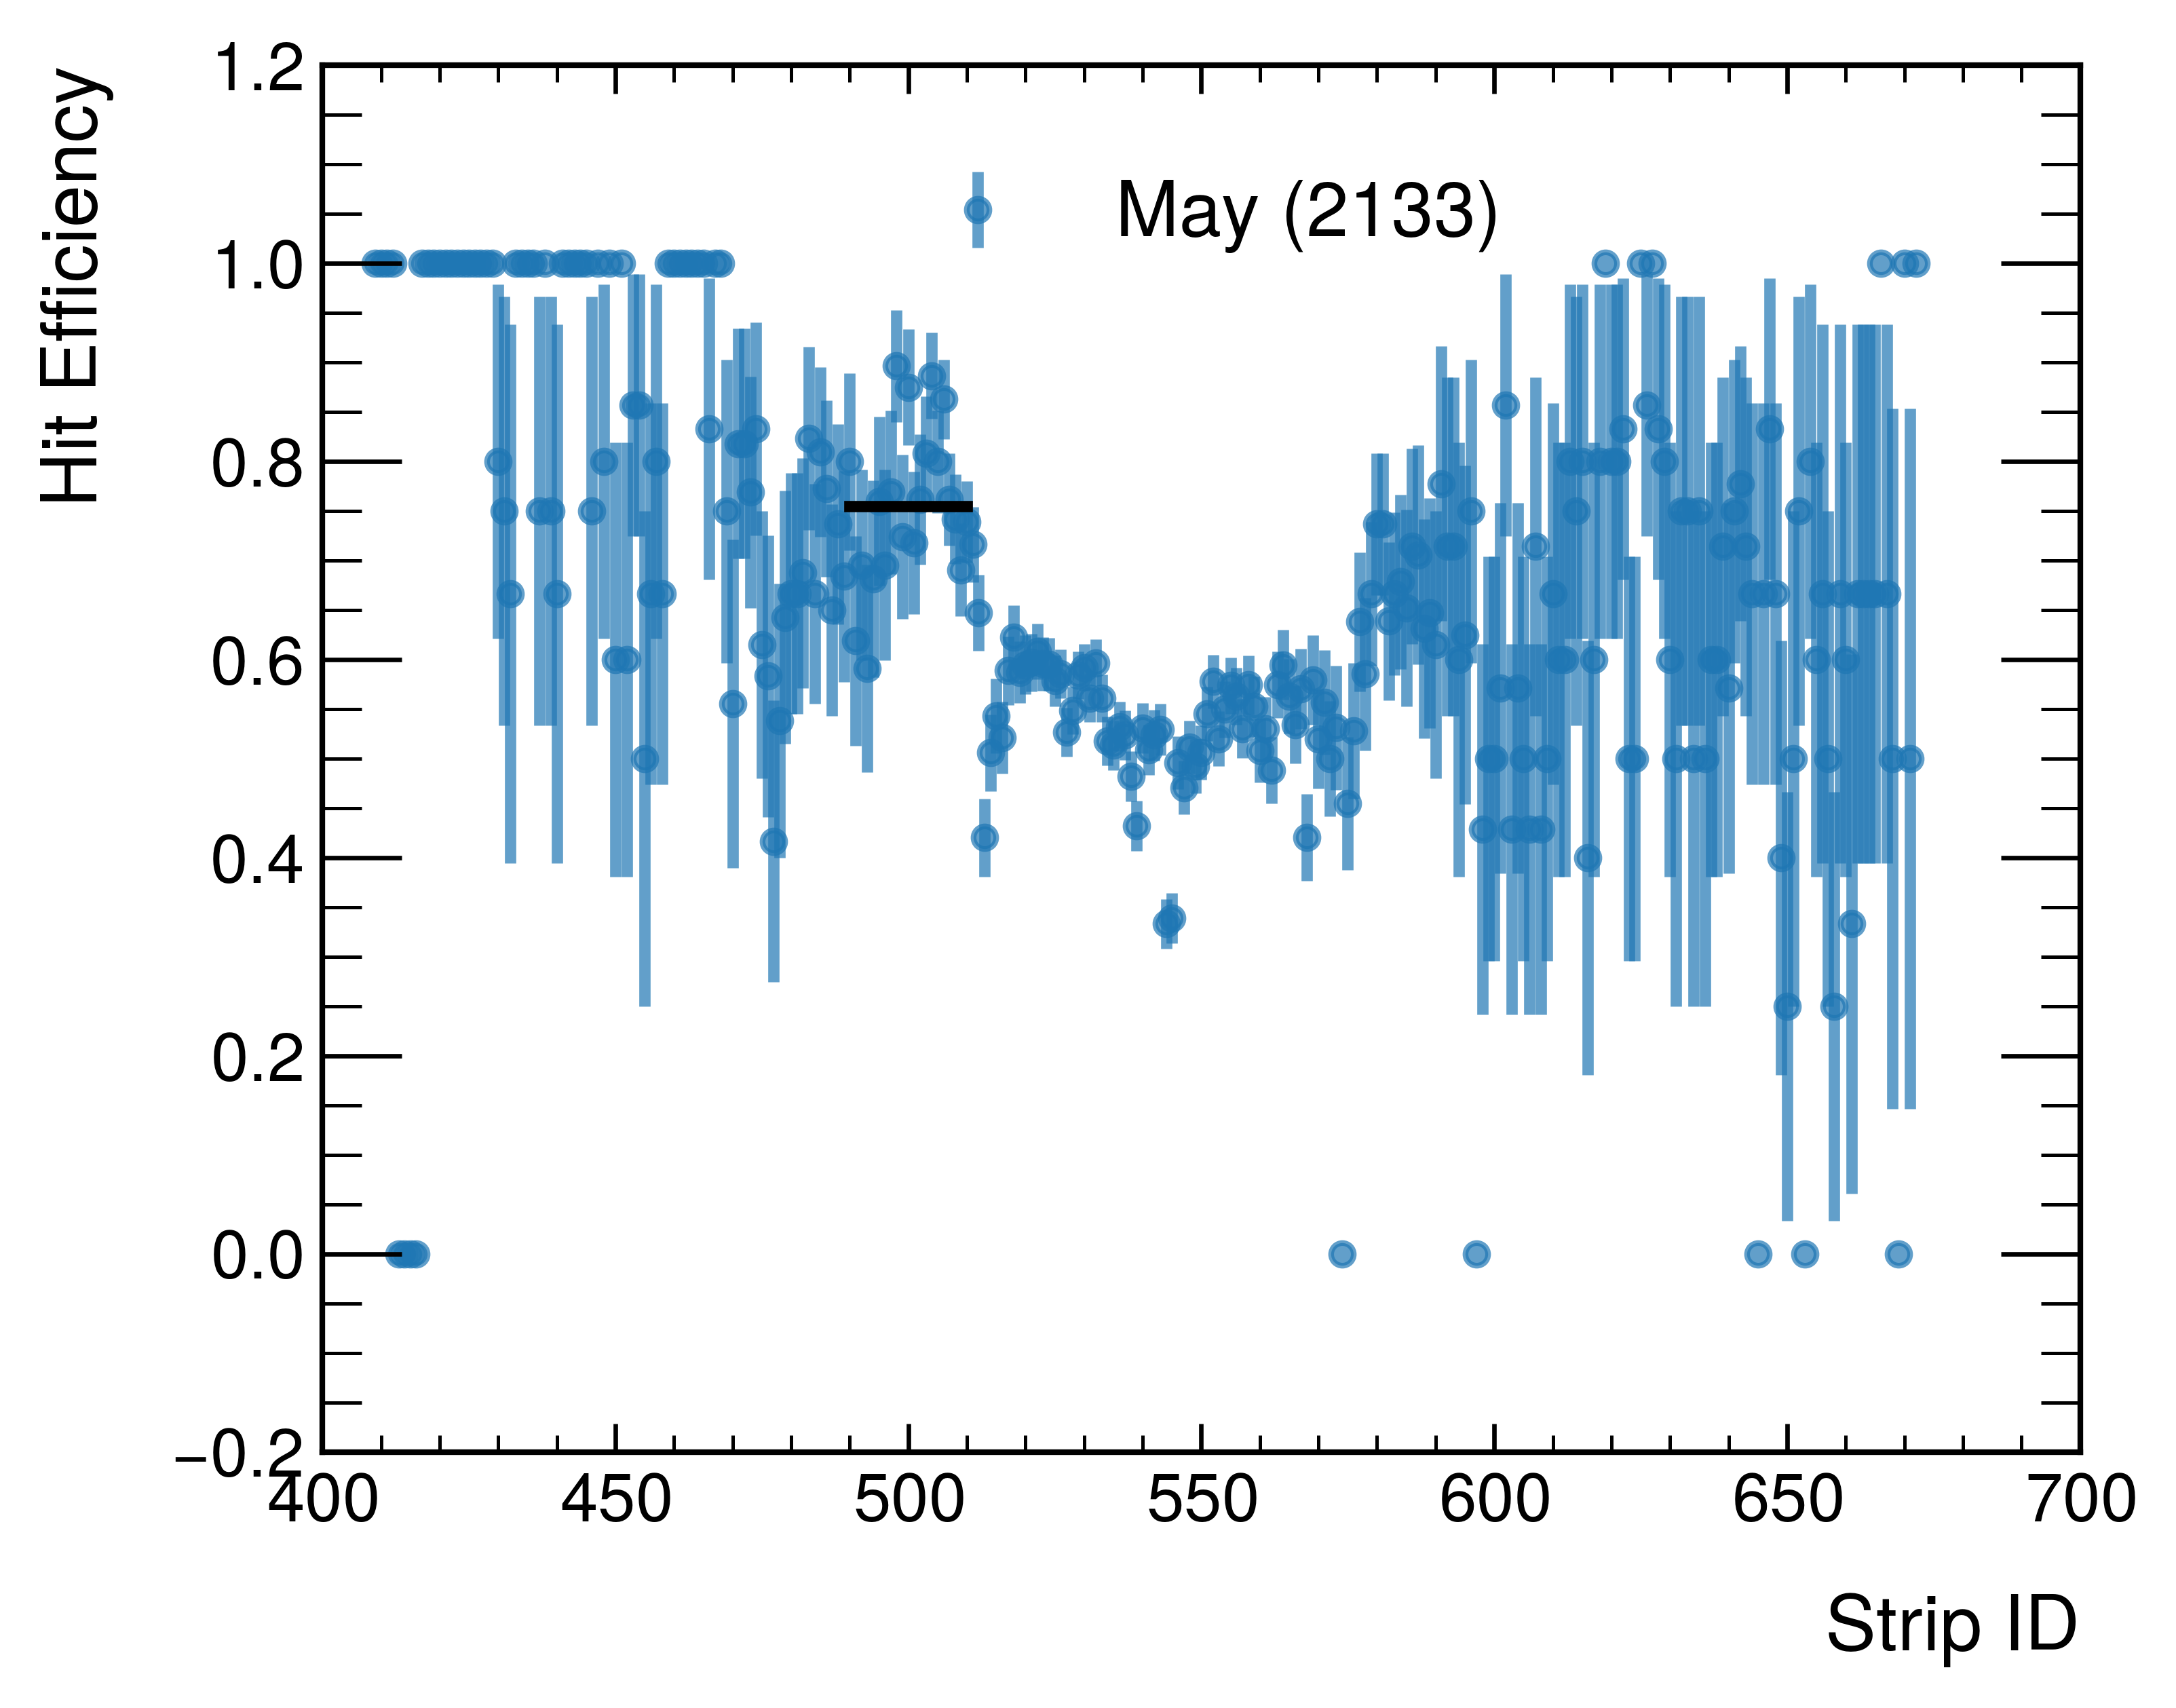

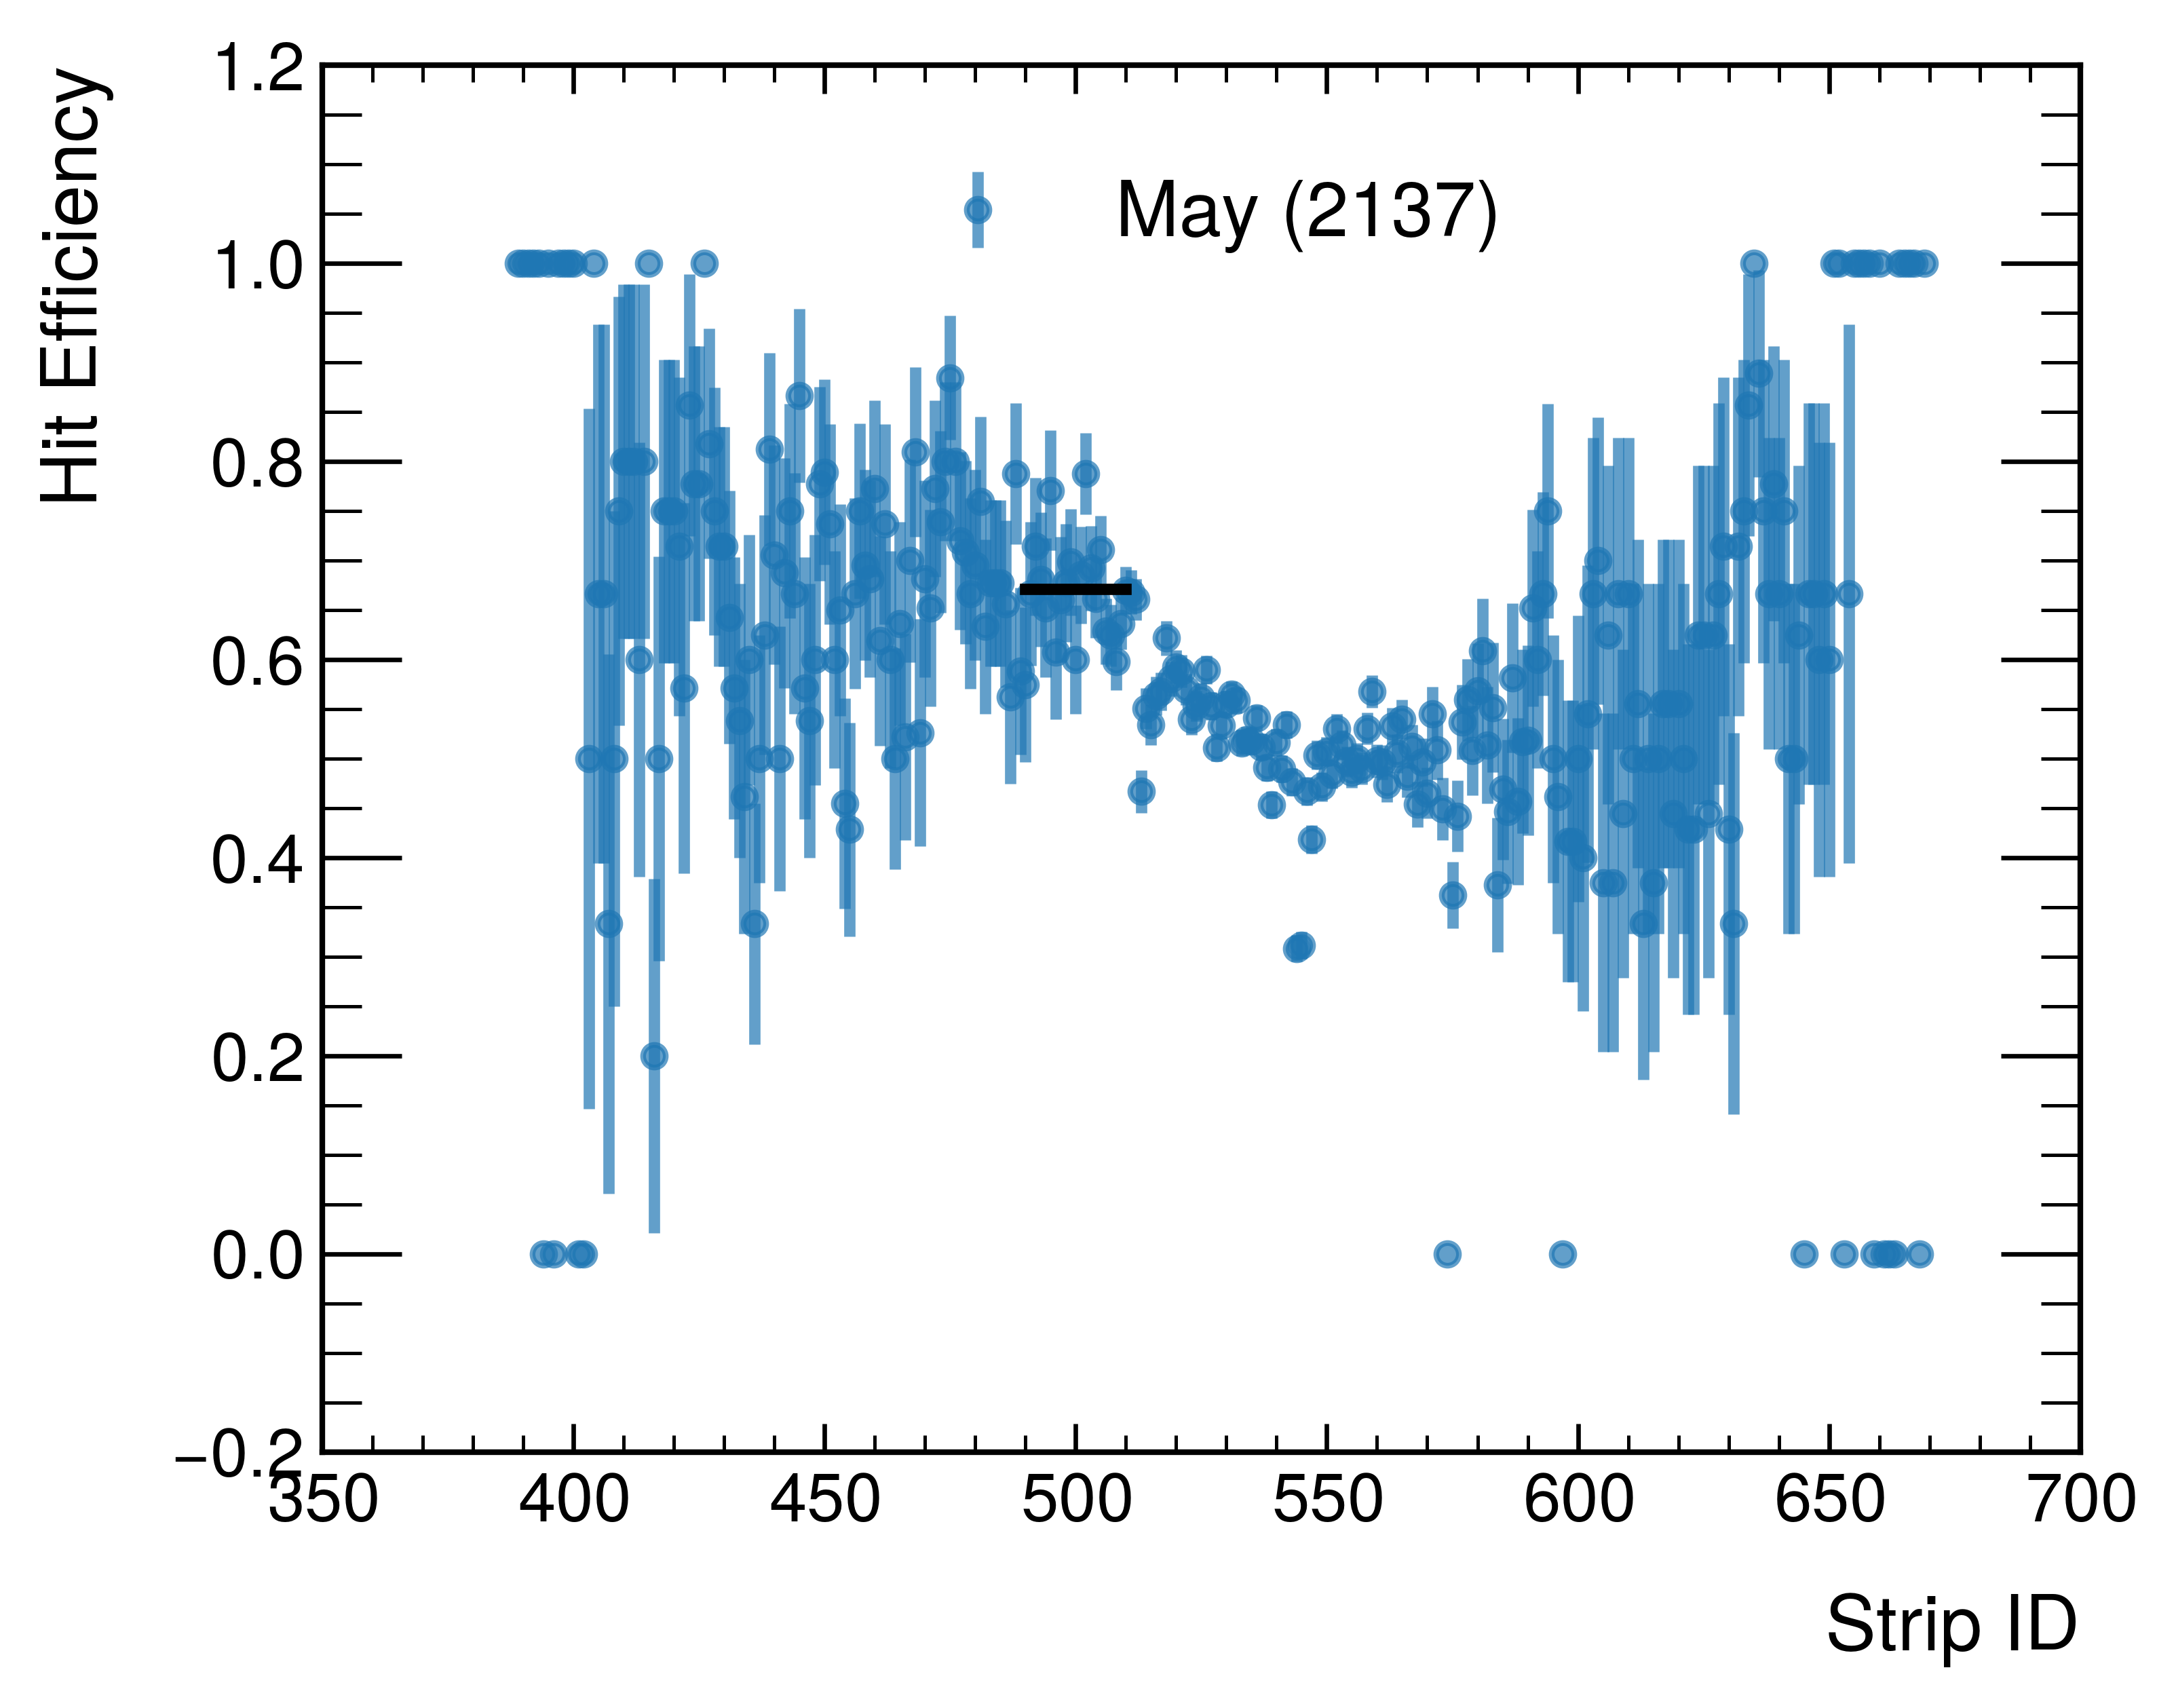

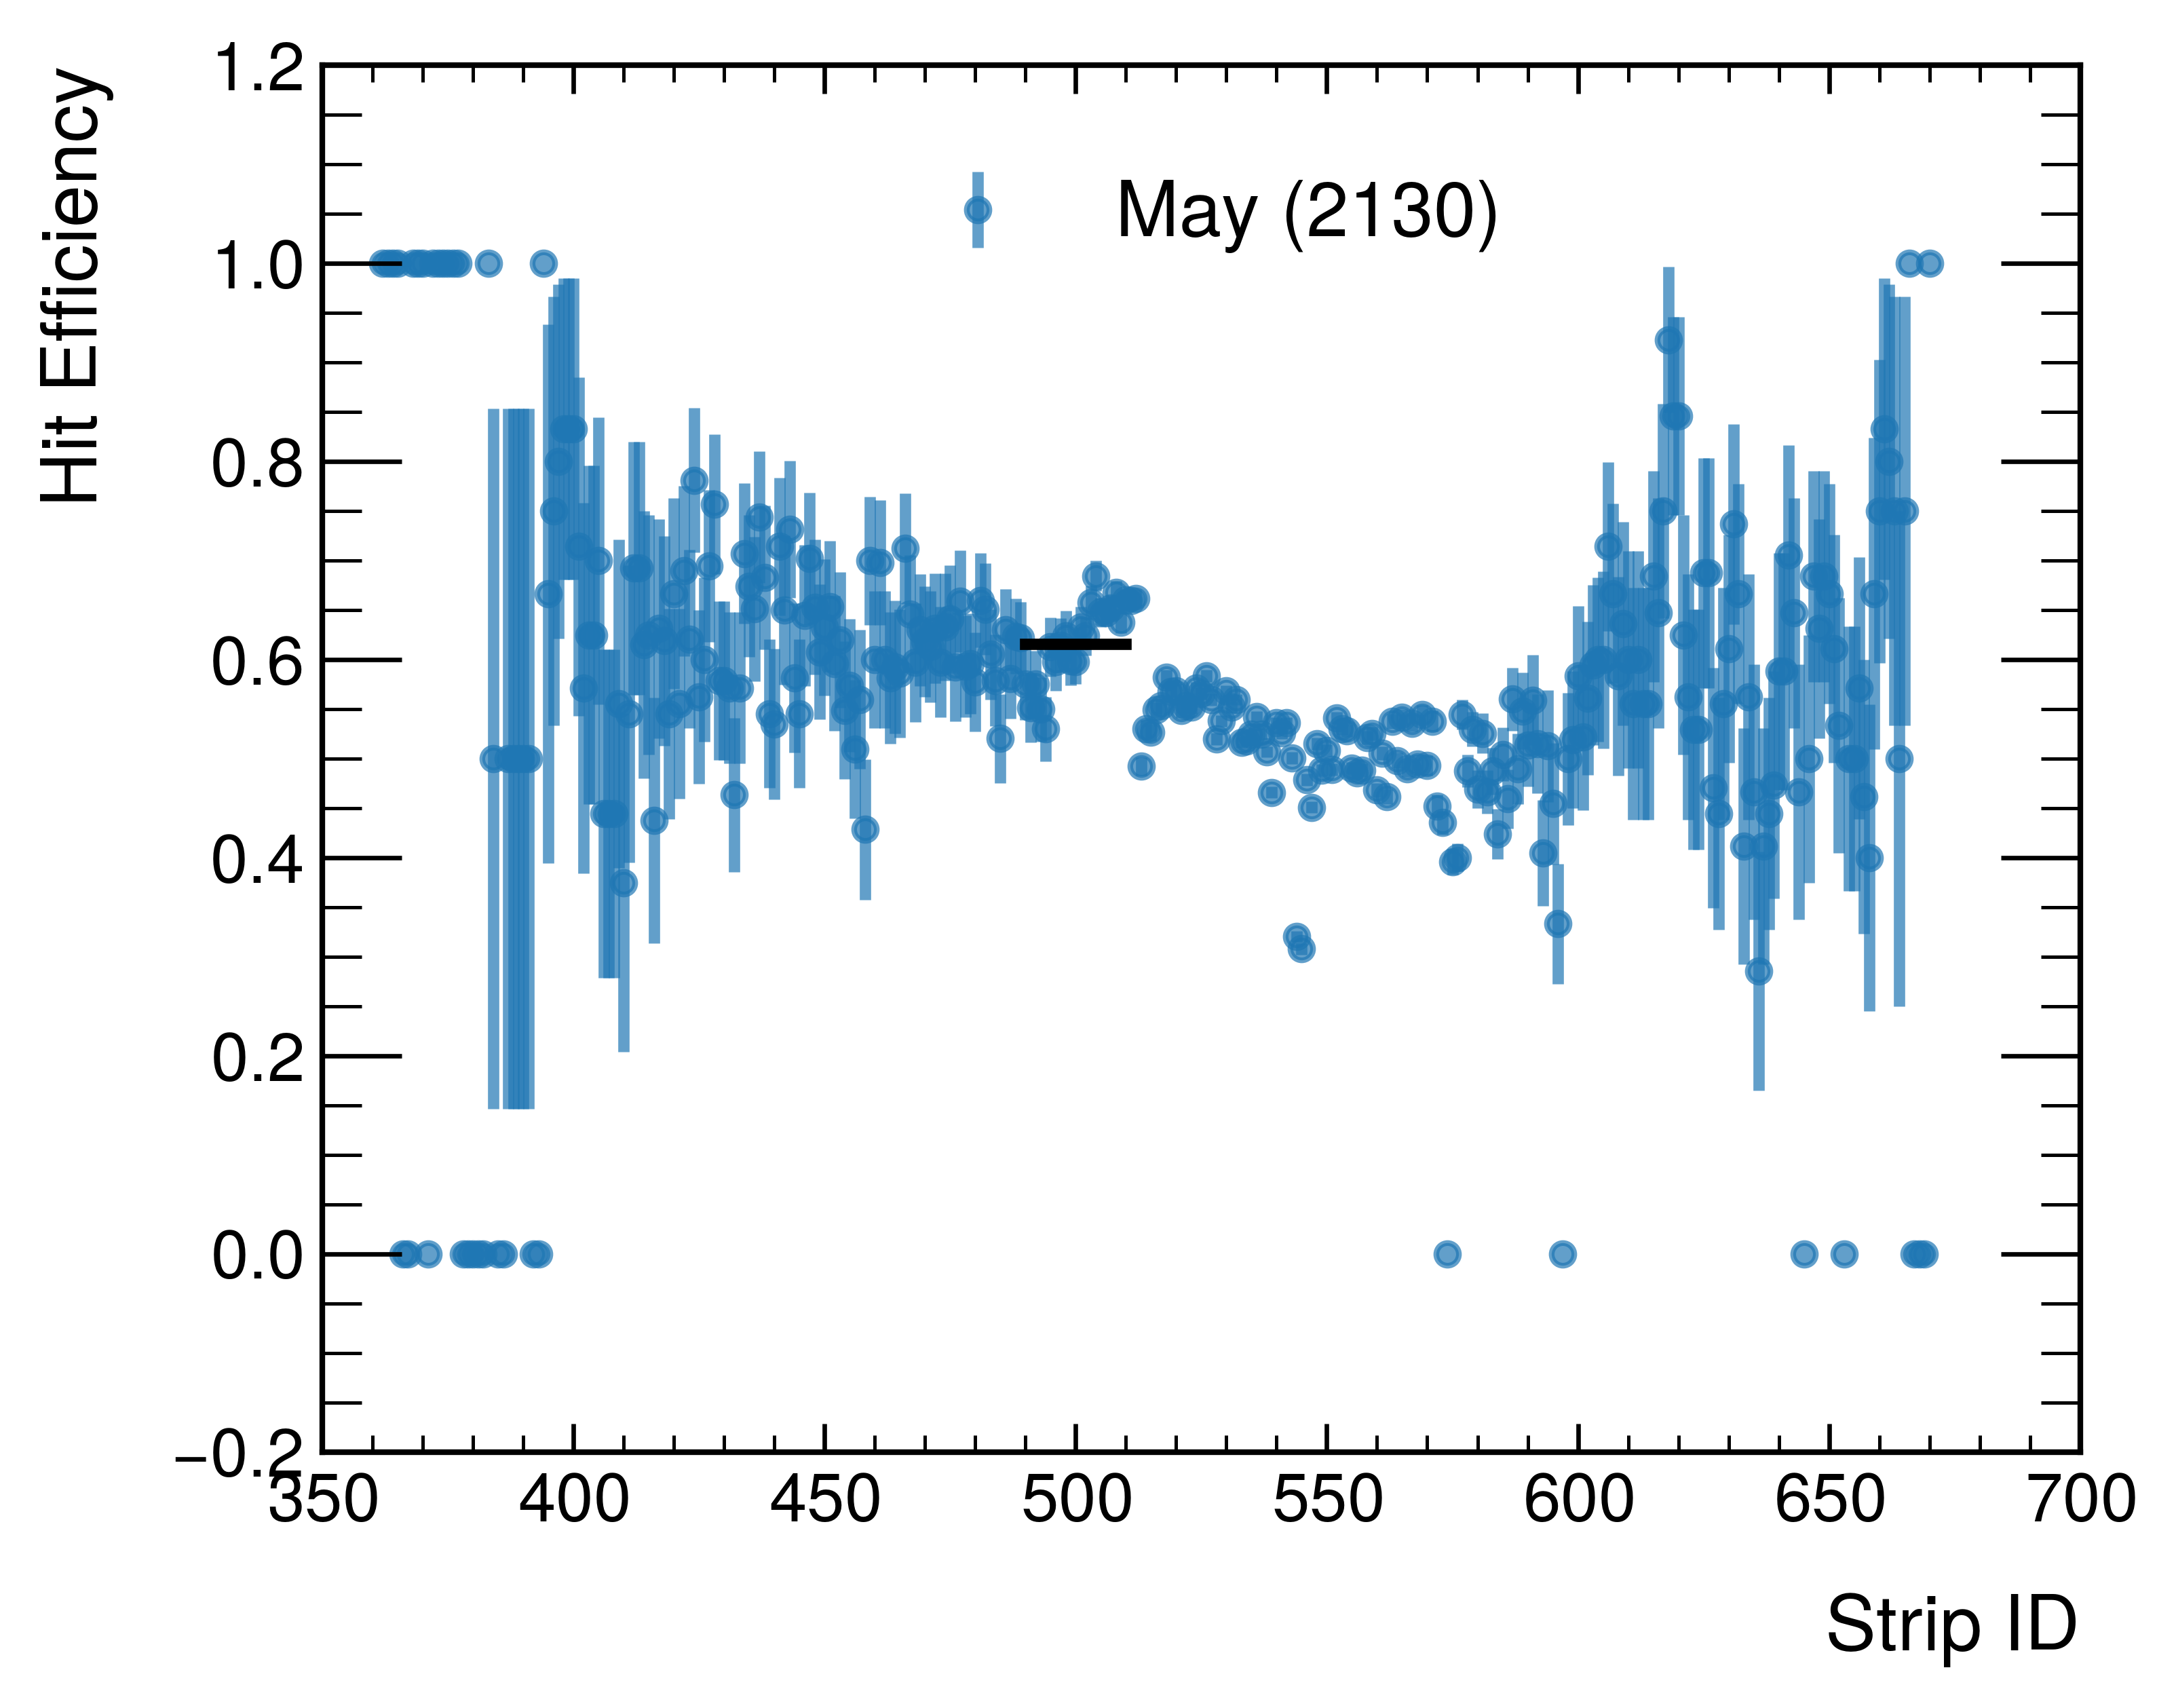

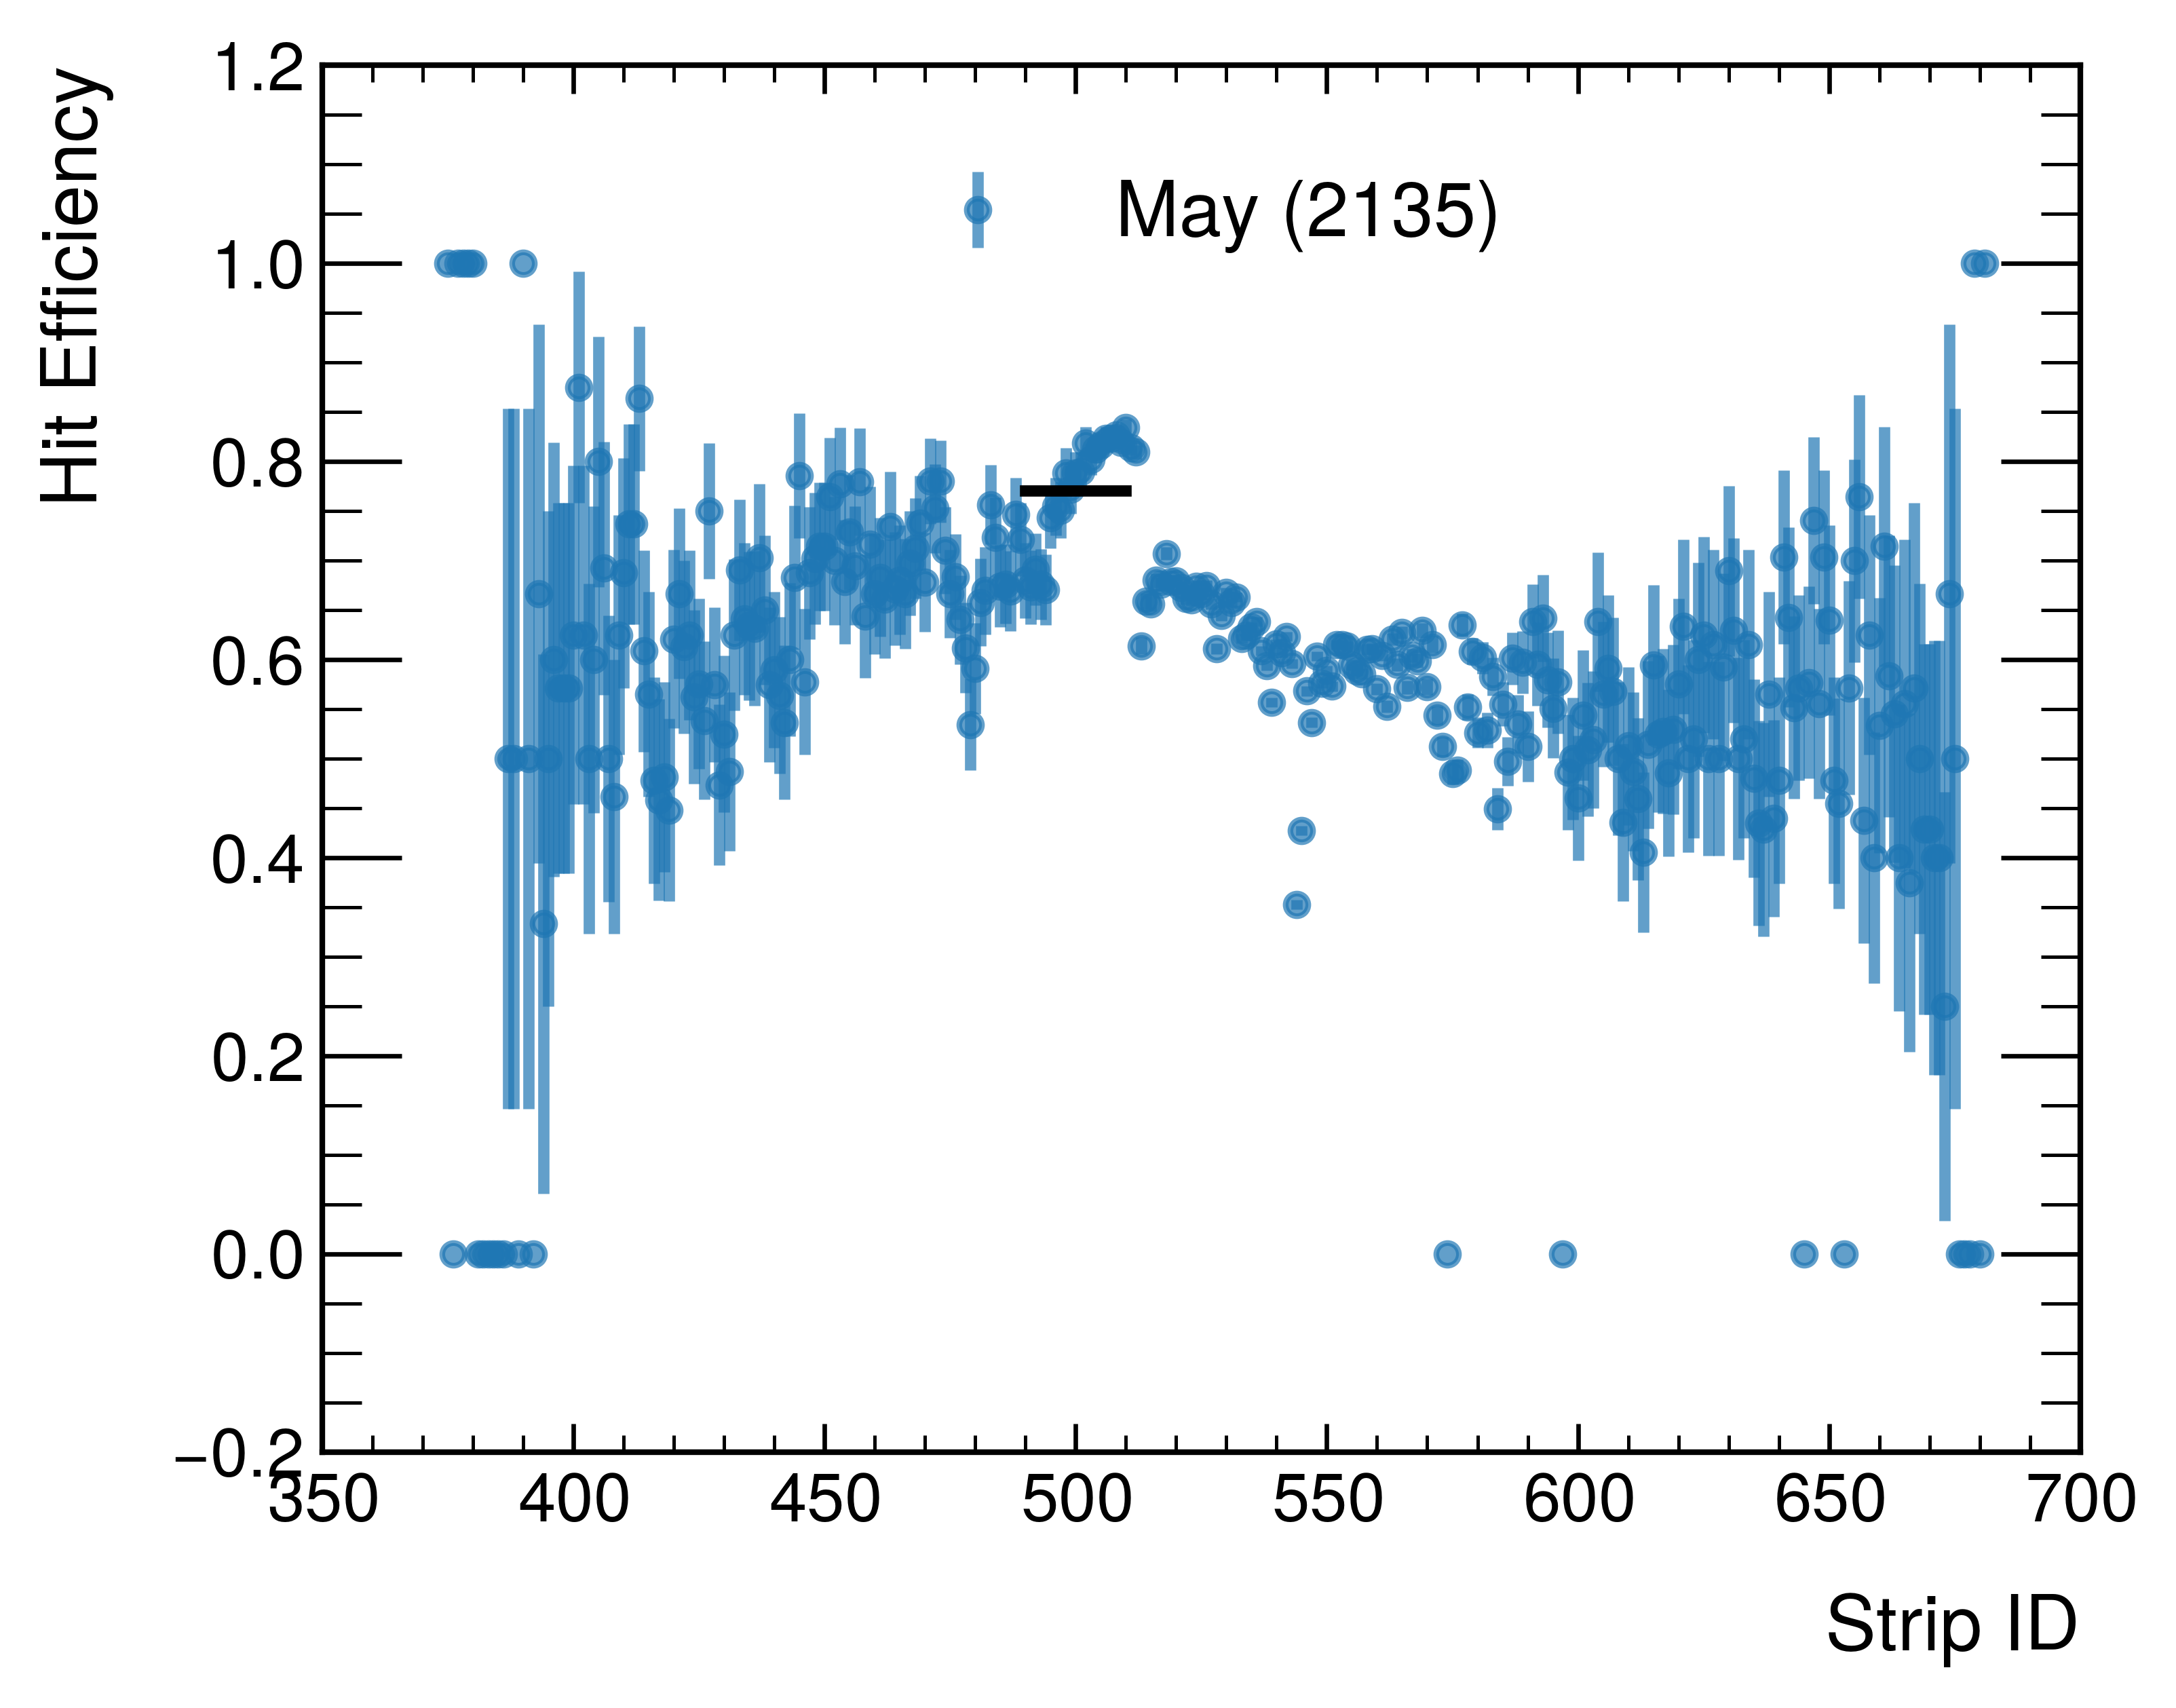

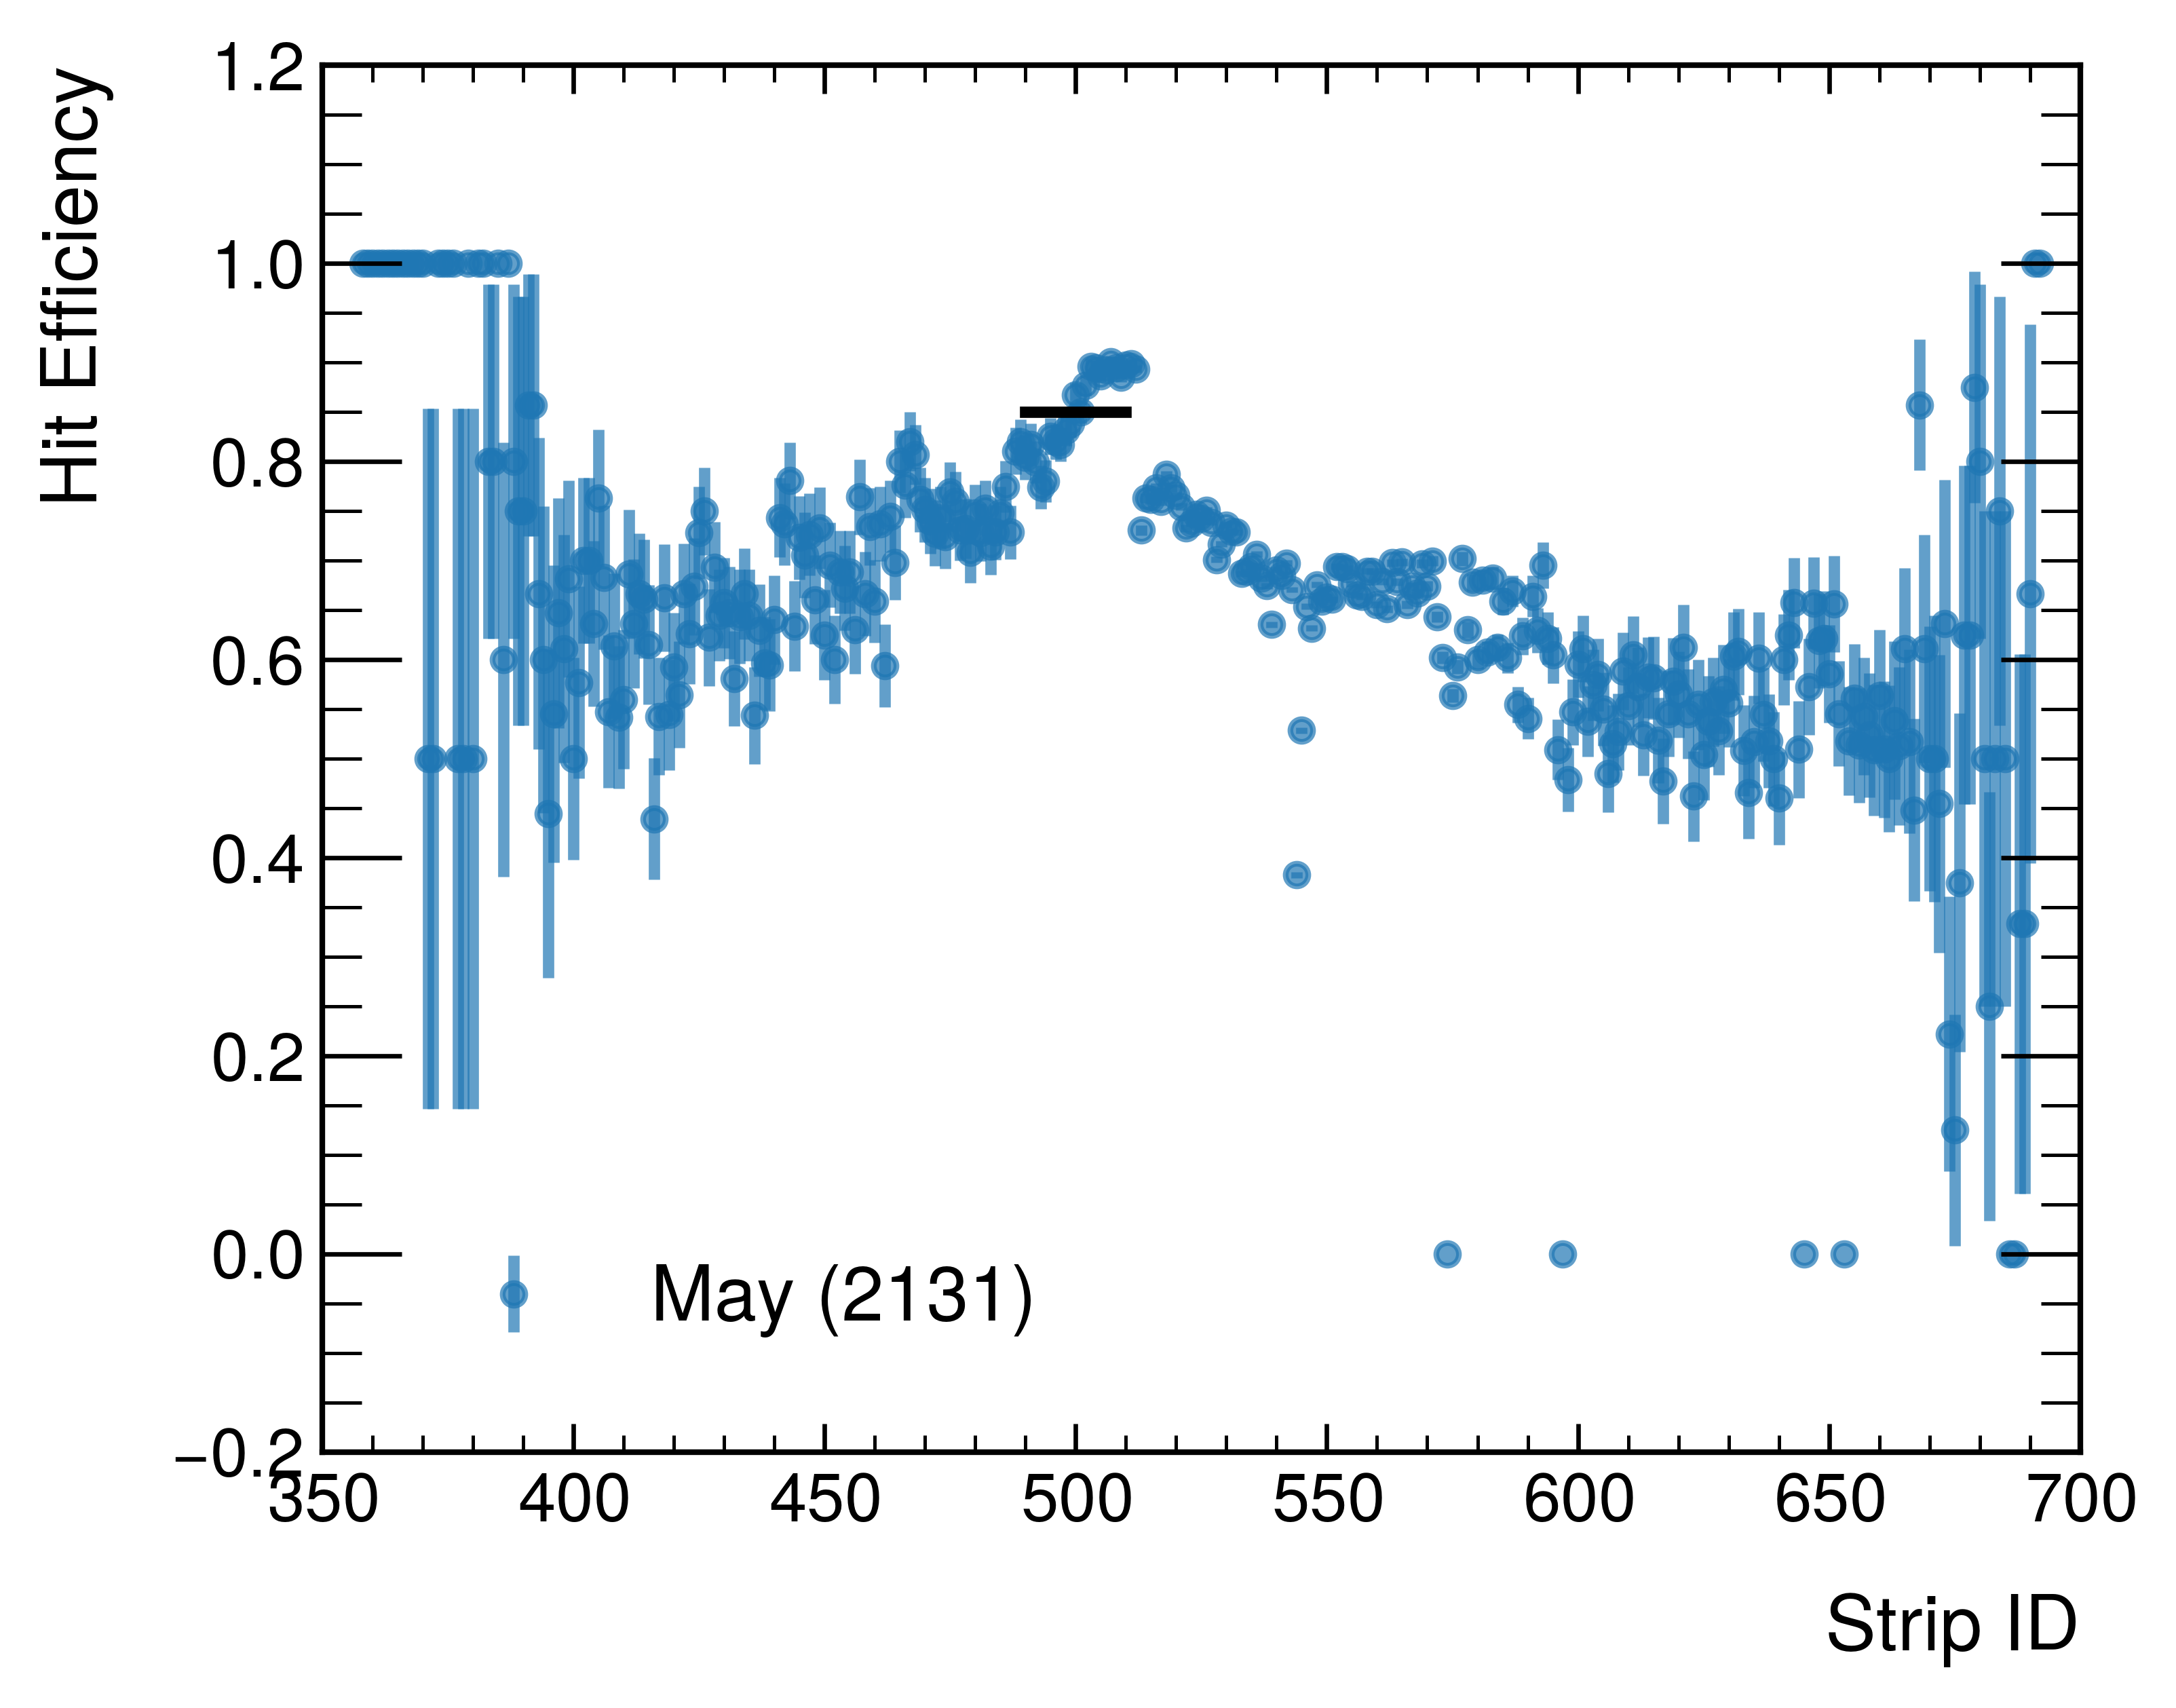

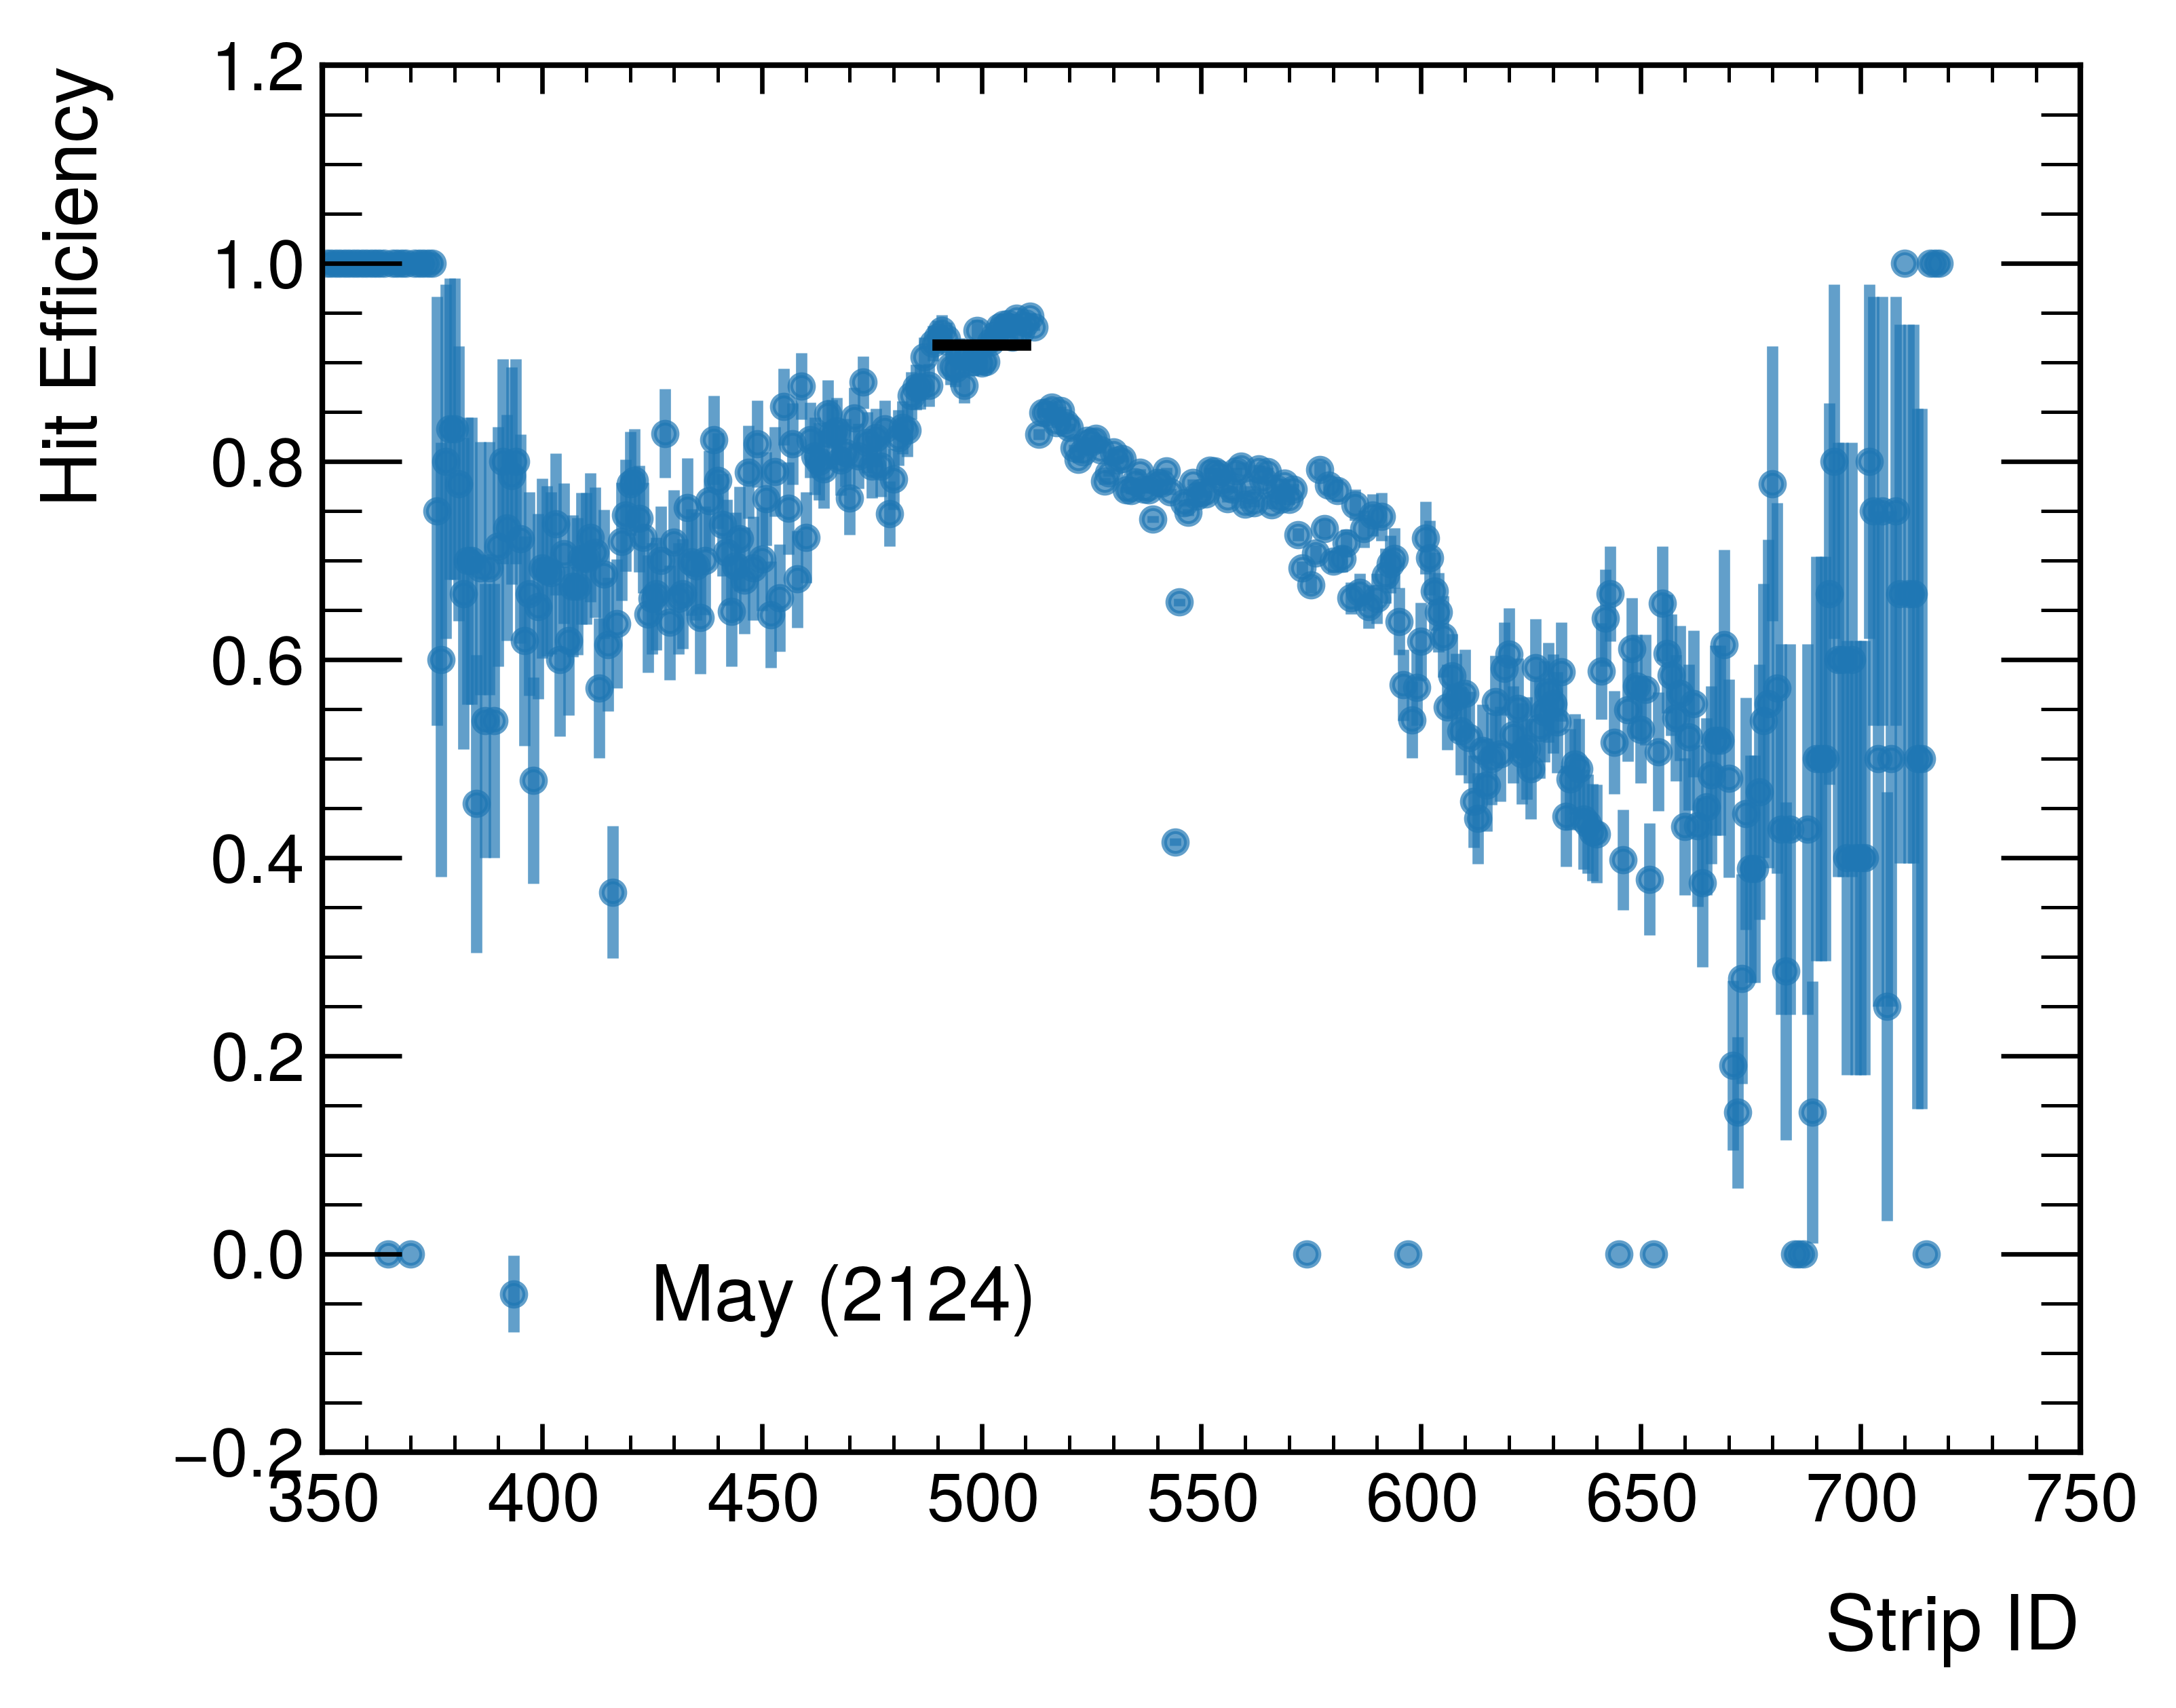

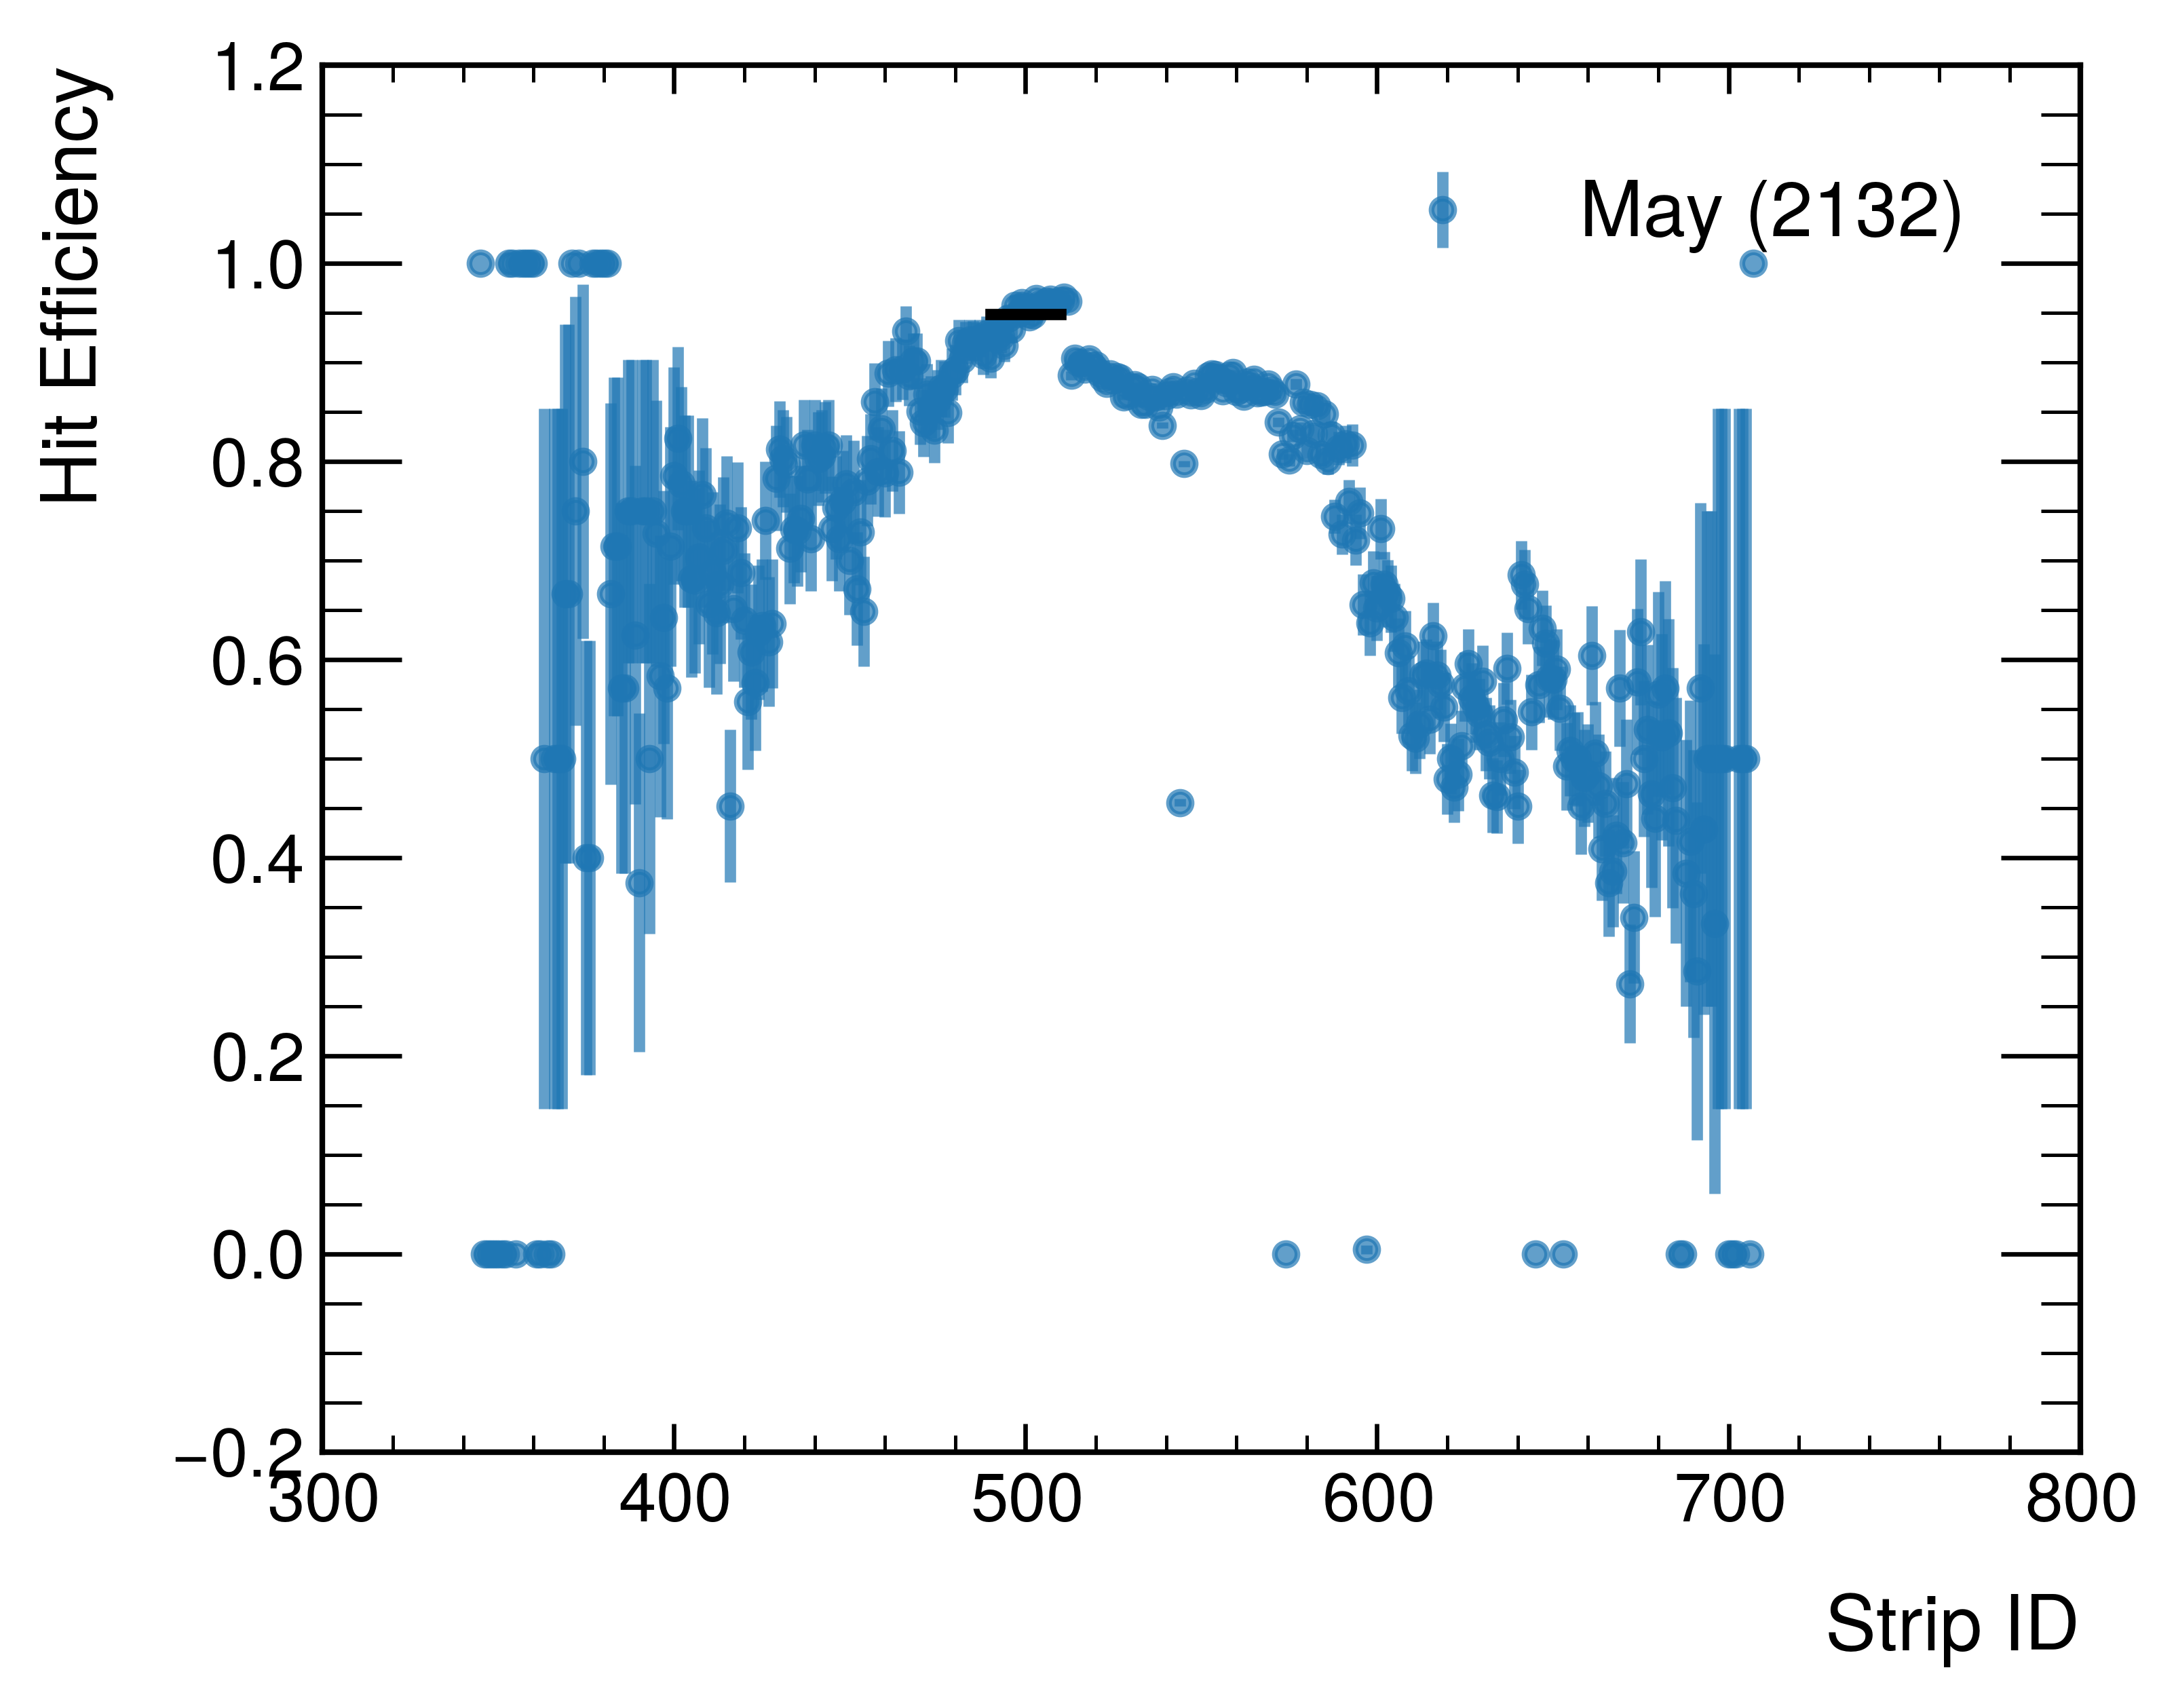

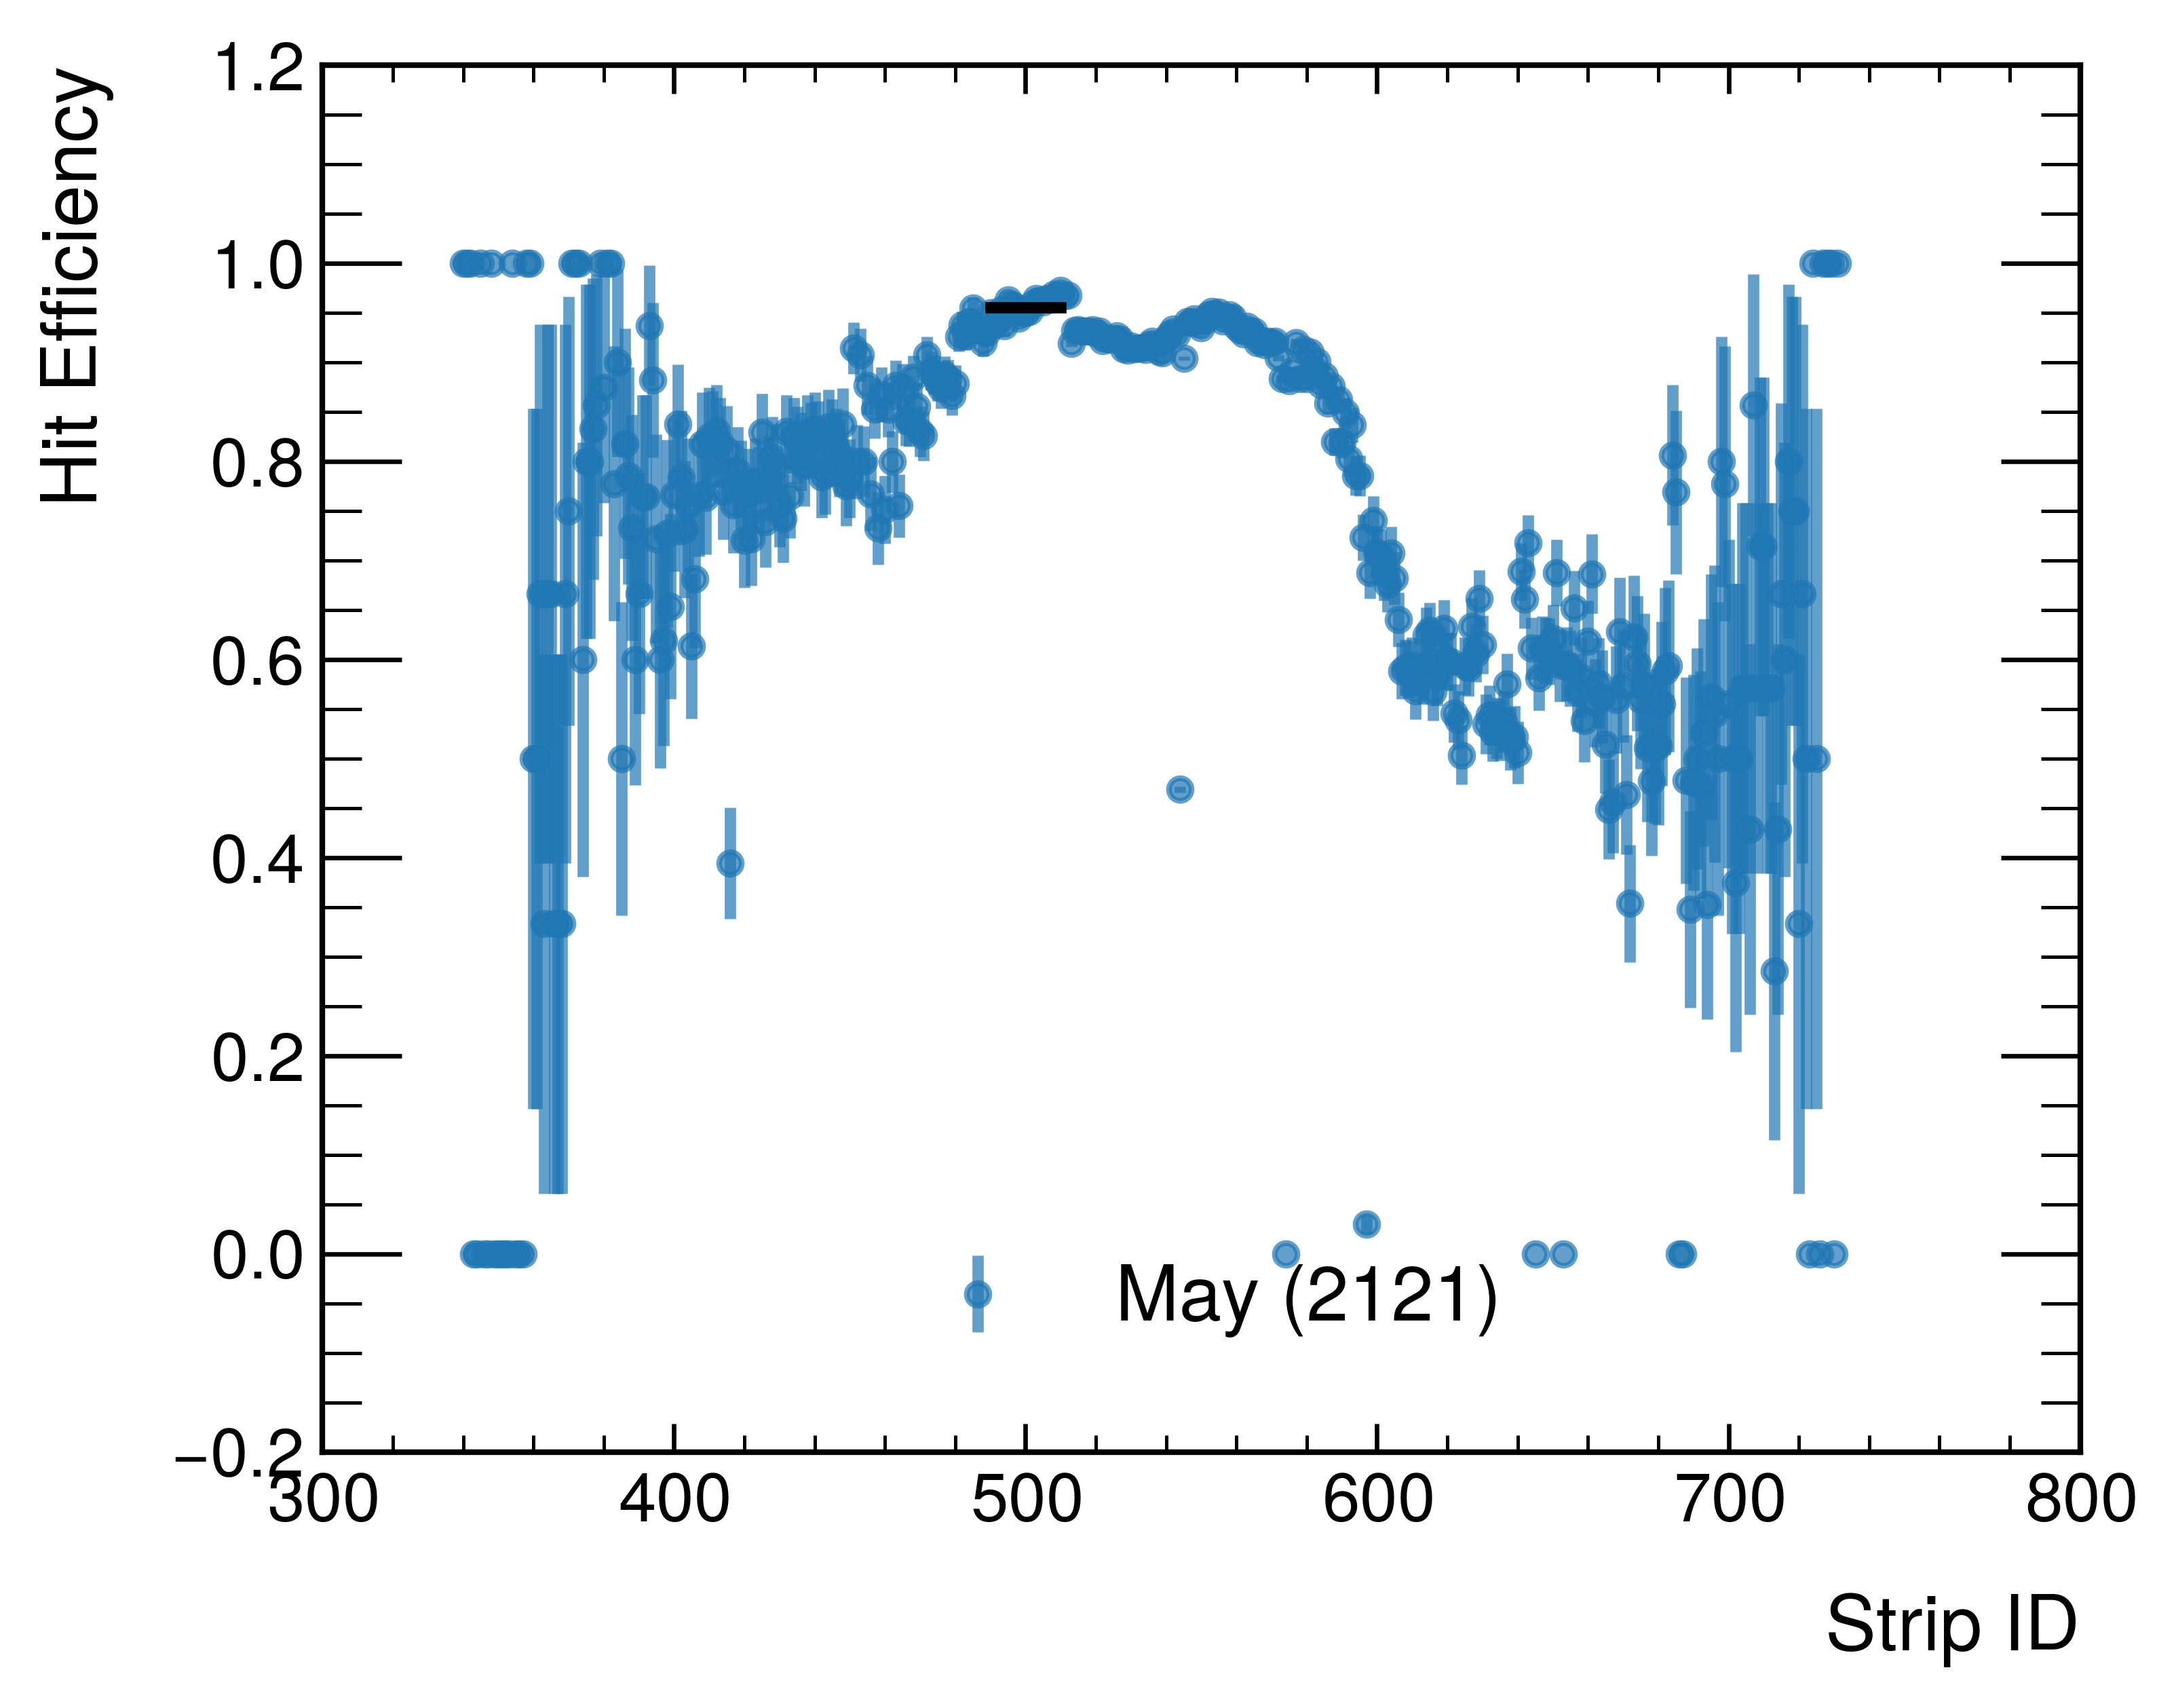

In [3]:
runs = ['2134', '2133','2137','2130','2135', '2131','2124',  '2132',  '2121']
HV = [400, 420, 435, 450,  470,480, 490, 500, 510]
hit_efficiency = []
err_efficiency = []

plt.style.use(hep.style.ATLAS)


for i, run in enumerate(runs):
    title = 'HitEfficiency.pkl'
    dir = '../reco/histos/'+run+'/'

    with open(dir+title, 'rb') as file:
        df = pickle.load(file)
        eff = np.array(df['efficiencies'])
        err = np.array(df['errors'])
        strips = np.array(df['strips'])
        plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 600)
        # plt.title(f'May ({run})', fontsize = 0.9*fontsize)
        plt.errorbar(strips, eff, yerr = err, fmt  = '.', alpha = 0.7, label = f'May ({run})')
        a = 490
        b = 510
        cut = (strips < b) & (strips > a)
        par, cov = curve_fit(line, strips[cut], eff[cut])
        x = np.linspace(a, b, 10)
        plt.plot(x, line(x, *par), color = 'k', zorder = 5)
        hit_efficiency.append(par[0])
        err_efficiency.append(np.sqrt(cov[0][0]))
        plt.xlabel('Strip ID', fontsize = 0.9*fontsize)
        plt.ylabel('Hit Efficiency', fontsize = 0.9*fontsize)
        plt.tick_params(labelsize = 0.8*fontsize)
        plt.legend(fontsize = 0.9*fontsize)

        plt.show()

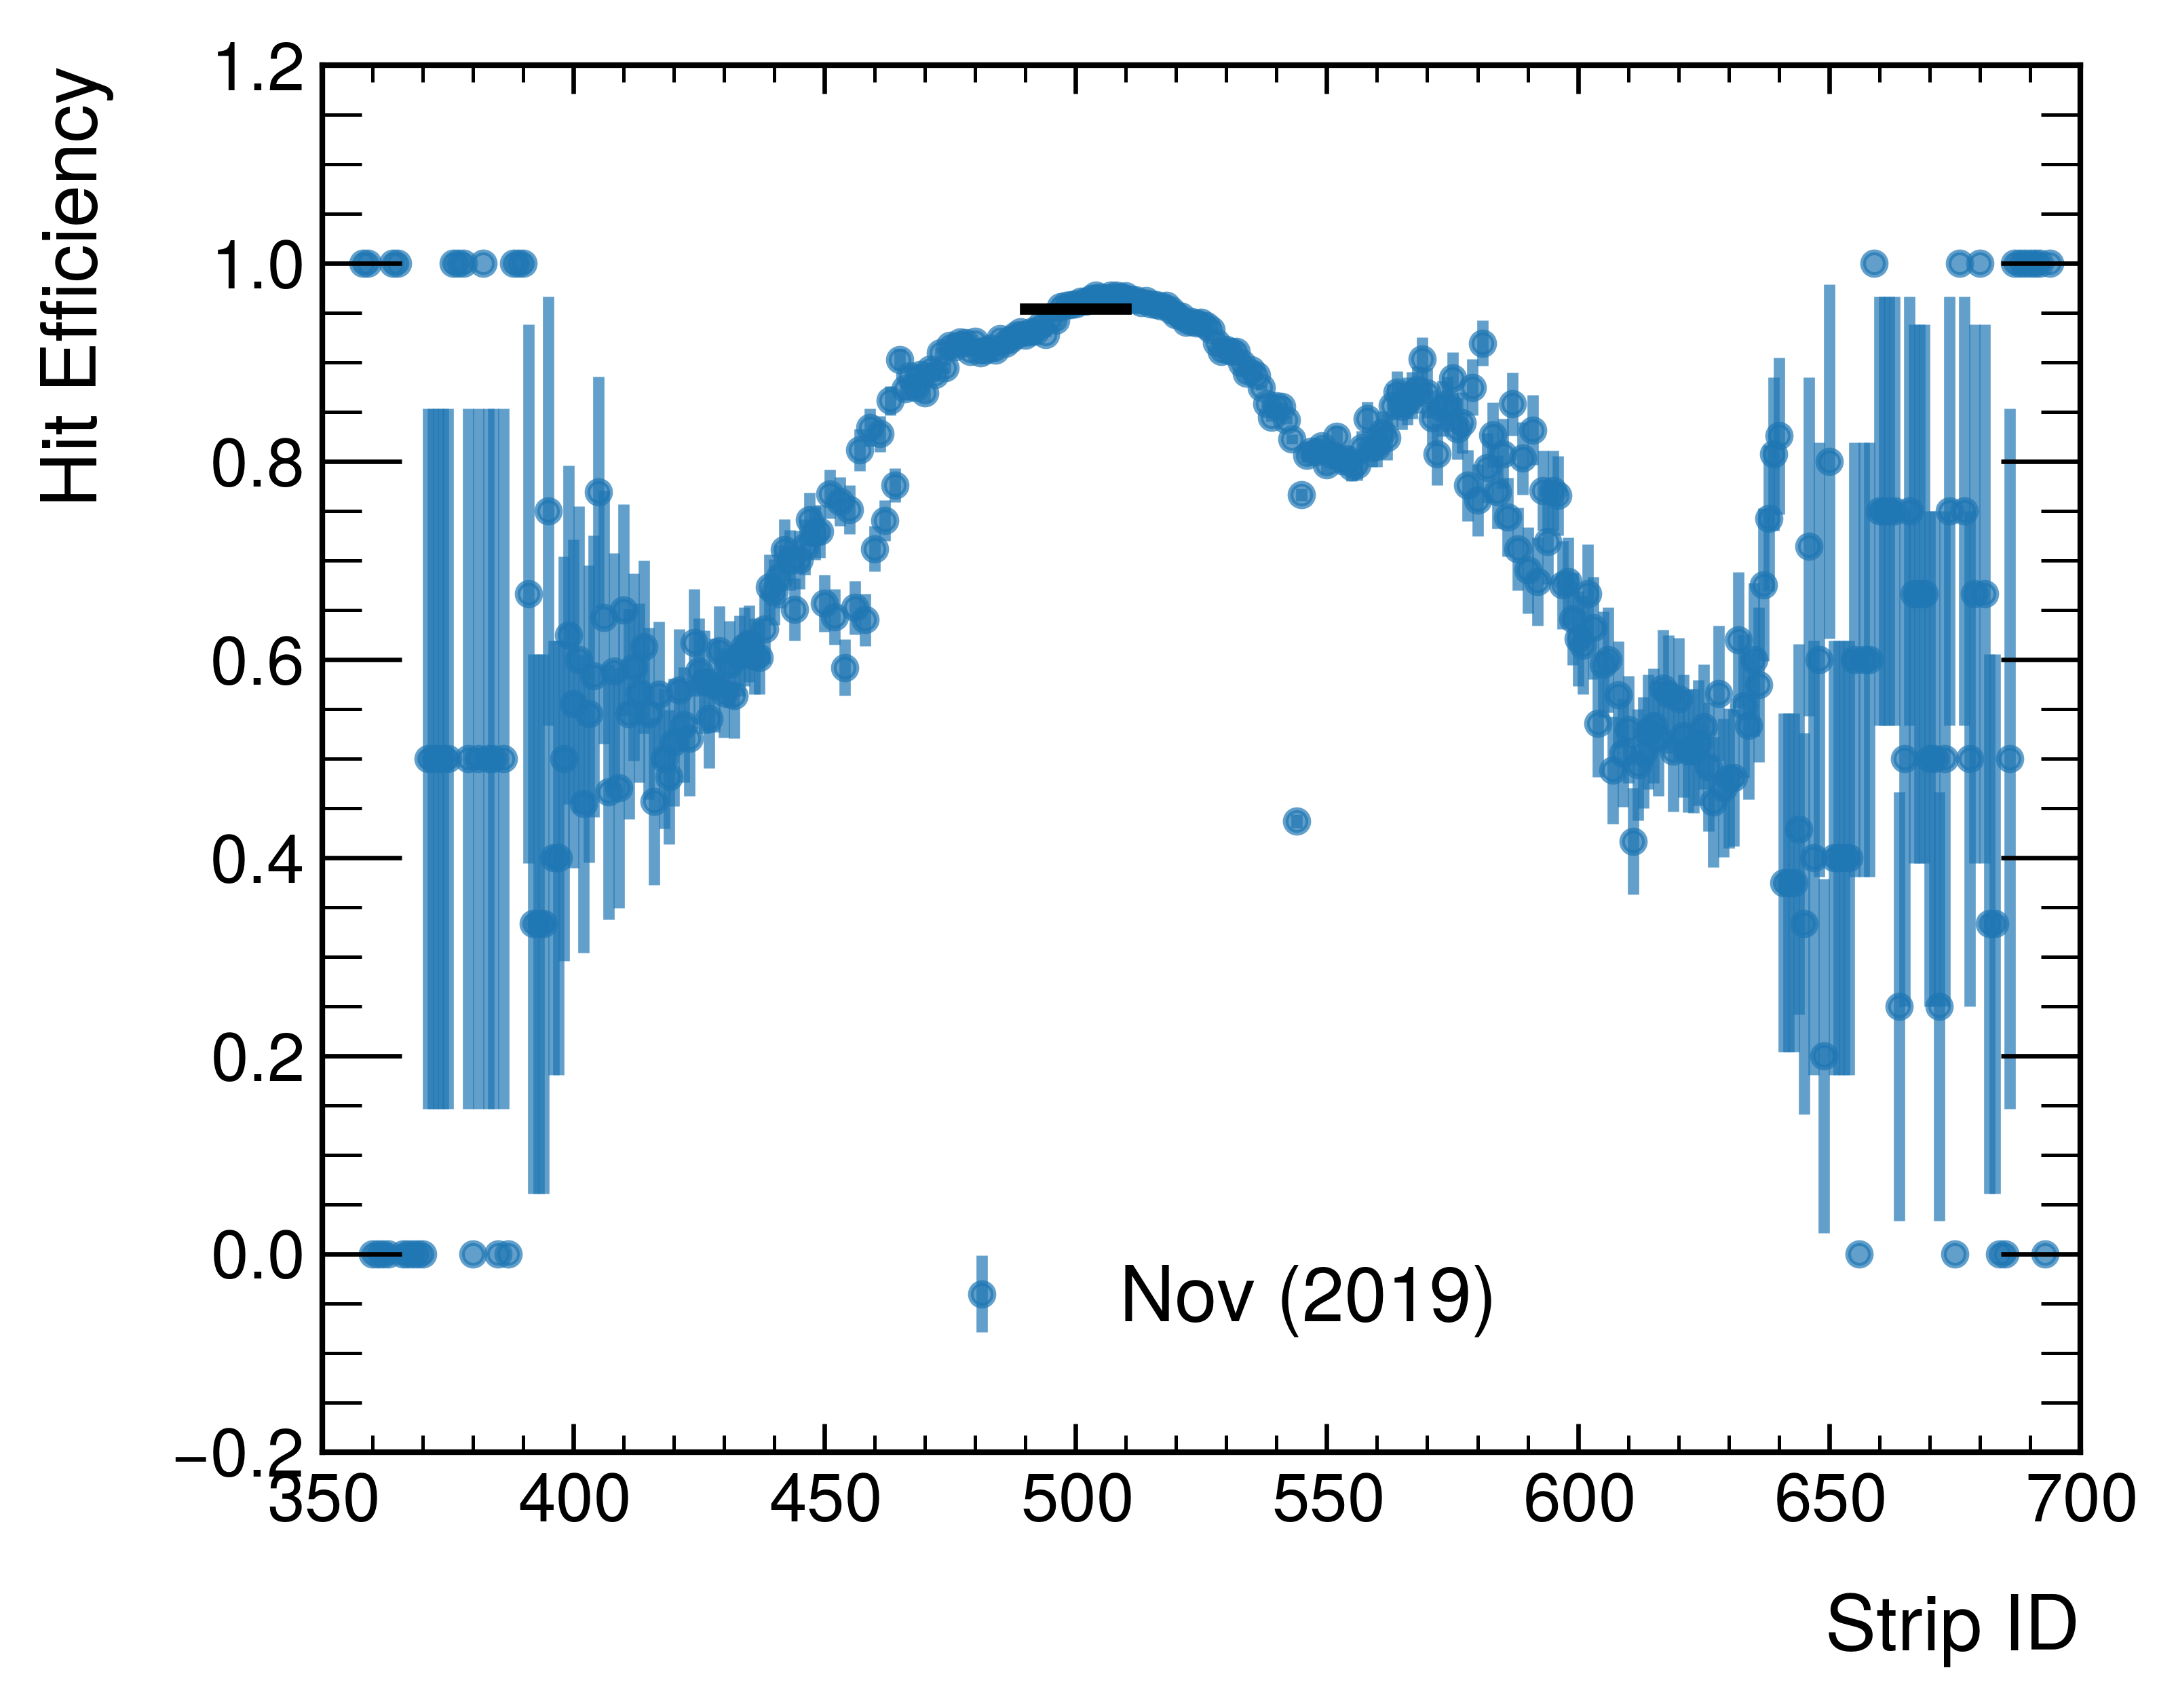

In [4]:
dir = '../reco/histos/2019/'
eff_nov = []
eff_err_nov = []
with open(dir+title, 'rb') as file:
    df = pickle.load(file)
    eff = np.array(df['efficiencies'])
    err = np.array(df['errors'])
    strips = np.array(df['strips'])
    plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 600)
    # plt.title(f'Nov (2019)', fontsize = 0.9*fontsize)
    plt.errorbar(strips, eff, yerr = err, fmt  = '.', alpha = 0.7, label = f'Nov (2019)')
    a = 490
    b = 510
    cut = (strips < b) & (strips > a)
    par, cov = curve_fit(line, strips[cut], eff[cut])
    x = np.linspace(a, b, 10)
    plt.plot(x, line(x, *par), color = 'k', zorder = 5)
    eff_nov.append(par[0])
    eff_err_nov.append(np.sqrt(cov[0][0]))
    plt.xlabel('Strip ID', fontsize = 0.9*fontsize)
    plt.ylabel('Hit Efficiency', fontsize = 0.9*fontsize)
    plt.tick_params(labelsize = 0.8*fontsize)
    plt.legend(fontsize = 0.9*fontsize)
    plt.show()

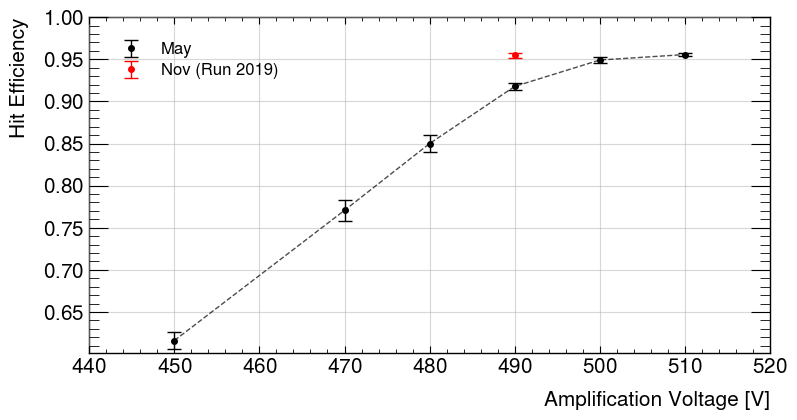

In [10]:
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(1.5*textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
plt.errorbar(HV[3:], hit_efficiency[3:], err_efficiency[3:], color = 'k', lw = 1, capsize = 5,fmt = '.',zorder = 10, label = 'May')
plt.plot(HV[3:], hit_efficiency[3:], color = 'k', lw = 1,zorder = 10, linestyle = 'dashed', alpha = 0.7)

plt.errorbar(490, eff_nov, yerr=eff_err_nov, color = 'red', lw = 1, capsize = 5,fmt = '.',zorder = 10, label = 'Nov (Run 2019)')

plt.xlabel('Amplification Voltage [V]', fontsize = 15)
plt.ylabel('Hit Efficiency', fontsize = 15)
plt.xlim(440,520)
plt.ylim(0.601,1)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.yaxis.offsetText.set_fontsize(fontsize)
plt.legend(fontsize=0.8*fontsize)
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.savefig('HitEfficiencyExMe.png', transparent = True, dpi = 600)
plt.savefig('HitEfficiencyExMe.pdf', dpi = 600)
# plt.grid(lw = 1, alpha = 0.4, zorder = 0)